In [302]:
import os
import numpy as np
import pandas as pd
import BioNick as bn
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from copydf import copyDF

In [2]:
def pr(v):
    v = v[(v['Status'] == 'Single') | (v['Status'] == 'Duplicated')] 
    v['li'] = v['Fraction'].astype(float) * v['Identity'].astype(float) 
    v = v.sort_values('li', ascending = False)
    v = v.drop_duplicates(['Assembly', 'Gene'])
    #assemblies with at least 90% BUSCO completeness
    v = v[v['Assembly'].isin(v.value_counts('Assembly')[v.value_counts('Assembly') > (v['Gene'].nunique() * 0.9)].index)]
    #genes appearing in at least 90% assemblies
    v = v[v['Gene'].isin(v.value_counts('Gene')[v.value_counts('Gene') > (v['Assembly'].nunique() * 0.9)].index)]
    return v

In [3]:
def es(adir): #export sites
    t = []
    for i in os.listdir(adir):
        for r in SeqIO.parse(adir+i, 'fasta'):
            t.append((i, r.id, str(r.seq)))
            
    d1 = pd.DataFrame(t)
    d1 = d1[d1[0].isin(d1[0].value_counts()[d1[0].value_counts() > d1[1].nunique() * 0.9].index)] #90% gene incidence 
    d1 = d1[d1[1].isin(d1[1].value_counts()[d1[1].value_counts() > d1[0].nunique() * 0.9].index)] #90% assembly incidence
    d1 = d1.drop_duplicates([1,2]) ##
    d1 = d1.pivot(index=0,columns=1,values=2).reset_index() #long to wide
    #fill nulls
    for i,r in d1.iterrows():
        gl = len(r.dropna().iloc[1])
        d1.loc[i,:] = d1.loc[i,:].fillna('-'*gl)
    
    #gene index
    t2 = []
    for i,r in d1.iterrows():
        t2 = t2 + [i]*len(r.iloc[1]) #gene id
    
    #seq to char
    t = []
    for c in d1.columns[1:]:
        t1 = []
        for g in d1.loc[:,c]:
            for char in g:
                t1.append(char) 
        t.append(t1)
        
    ti = list(map(list, zip(*t))) #transpose list
    
    f1 = pd.DataFrame(ti)
    f1['gi'] = t2
    
    return d1,f1

In [ ]:
d1,f1 = es('../r7/eudicots/eu1/aligned/')
d2,f2 = es('../r7/arthropoda/ar1/aligned/')
d3,f3 = es('../r7/vertebrata/ve1/aligned/')
d4,f4 = es('../r7/fungi/fu1/aln2/')
d5,f5 = es('../r7/ascomycota/as1/aligned/')
d6,f6 = es('../r7/basidiomycota/ba1/aligned/')
d7,f7 = es('../r7/liliopsida/li1/aligned/')
d8,f8 = es('../r7/chlorophyta/ch2/aligned/')
d9,f9 = es('../r7/metazoa/me1/aligned/')
d10,f10 = es('../r7/viridiplantae/vp0/aligned/')

In [ ]:
f1 = pd.read_csv('../r7/viridiplantae/vp0/f10.tsv', sep = '\t')
f2 = pd.read_csv('../r7/liliopsida/li1/f7.tsv', sep = '\t')
f3 = pd.read_csv('../r7/eudicots/eu1/f1.tsv', sep = '\t')
f4 = pd.read_csv('../r7/fungi/fu1/f4.tsv', sep = '\t')
f5 = pd.read_csv('../r7/ascomycota/as1/f5.tsv', sep = '\t')
f6 = pd.read_csv('../r7/basidiomycota/ba1/f6.tsv', sep = '\t')
f7 = pd.read_csv('../r7/metazoa/me1/f9.tsv', sep = '\t')
f8 = pd.read_csv('../r7/arthropoda/ar1/f2.tsv', sep = '\t')
f9 = pd.read_csv('../r7/vertebrata/ve1/f3.tsv', sep = '\t')
f10= pd.read_csv('../r7/chlorophyta/ch2/f8.tsv', sep = '\t')

In [883]:
#sites filtered out
c = 0
for i,r in f1.iterrows():
    if r[:-1].to_list().count('-') > 51:
        c+=1
print(c)

756691


In [886]:
#sites remaining
921743-756691

165052

In [885]:
#fraction filtered out
756691/921743

0.8209349026789463

In [884]:
f1.shape

(921743, 514)

In [1712]:
def pf(f):
    f['gaps'] = f.apply(lambda r: sum(r == '-'), axis=1)
    f = f[f['gaps'] < (f.shape[1] - 2)*0.05]
    f['unc'] = f.iloc[:,0:f.shape[1]-2].apply(lambda r: r.loc[r != '-'].nunique(), axis = 1)
    return f

In [ ]:
f1 = pf(f1)
f1.to_csv('../r7/viridiplantae/vp0/pf10.tsv', sep = '\t', index = 0)
f2 = pf(f2)
f2.to_csv('../r7/liliopsida/li1/pf7.tsv', sep = '\t', index = 0)
f3 = pf(f3)
f3.to_csv('../r7/eudicots/eu1/pf1.tsv', sep = '\t', index = 0)
f4 = pf(f4)
f4.to_csv('../r7/fungi/fu1/pf4.tsv', sep = '\t', index = 0)
f5 = pf(f5)
f5.to_csv('../r7/ascomycota/as1/pf5.tsv', sep = '\t', index = 0)
f6 = pf(f6)
f6.to_csv('../r7/basidiomycota/ba1/pf6.tsv', sep = '\t', index = 0)
f7 = pf(f7)
f7.to_csv('../r7/metazoa/me1/pf9.tsv', sep = '\t', index = 0)
f8 = pf(f8)
f8.to_csv('../r7/arthropoda/ar1/pf2.tsv', sep = '\t', index = 0)
f9 = pf(f9)
f9.to_csv('../r7/vertebrata/ve1/pf3.tsv', sep = '\t', index = 0)
f10= pf(f10)
f10.to_csv('../r7/chlorophyta/ch2/pf8.tsv', sep = '\t', index = 0)

In [303]:
f1 = pd.read_csv('../r7/viridiplantae/vp0/pf10.tsv', sep = '\t')
f2 = pd.read_csv('../r7/liliopsida/li1/pf7.tsv', sep = '\t')
f3 = pd.read_csv('../r7/eudicots/eu1/pf1.tsv', sep = '\t')
f4 = pd.read_csv('../r7/fungi/fu1/pf4.tsv', sep = '\t')
f5 = pd.read_csv('../r7/ascomycota/as1/pf5.tsv', sep = '\t')
f6 = pd.read_csv('../r7/basidiomycota/ba1/pf6.tsv', sep = '\t')
f7 = pd.read_csv('../r7/metazoa/me1/pf9.tsv', sep = '\t')
f8 = pd.read_csv('../r7/arthropoda/ar1/pf2.tsv', sep = '\t')
f9 = pd.read_csv('../r7/vertebrata/ve1/pf3.tsv', sep = '\t')
f10= pd.read_csv('../r7/chlorophyta/ch2/pf8.tsv', sep = '\t')

/tmp/ipykernel_1090450/42373638.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,0].set_yticklabels([int(int(x._text)/1000) for x in ax[0,0].get_yticklabels()], rotation = 0)
/tmp/ipykernel_1090450/42373638.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,1].set_yticklabels([int(int(x._text)/1000) for x in ax[0,1].get_yticklabels()], rotation = 0)
/tmp/ipykernel_1090450/42373638.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,2].set_yticklabels([int(int(x._text)/1000) for x in ax[0,2].get_yticklabels()], rotation = 0)
/tmp/ipykernel_1090450/42373638.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,3].set_yticklab

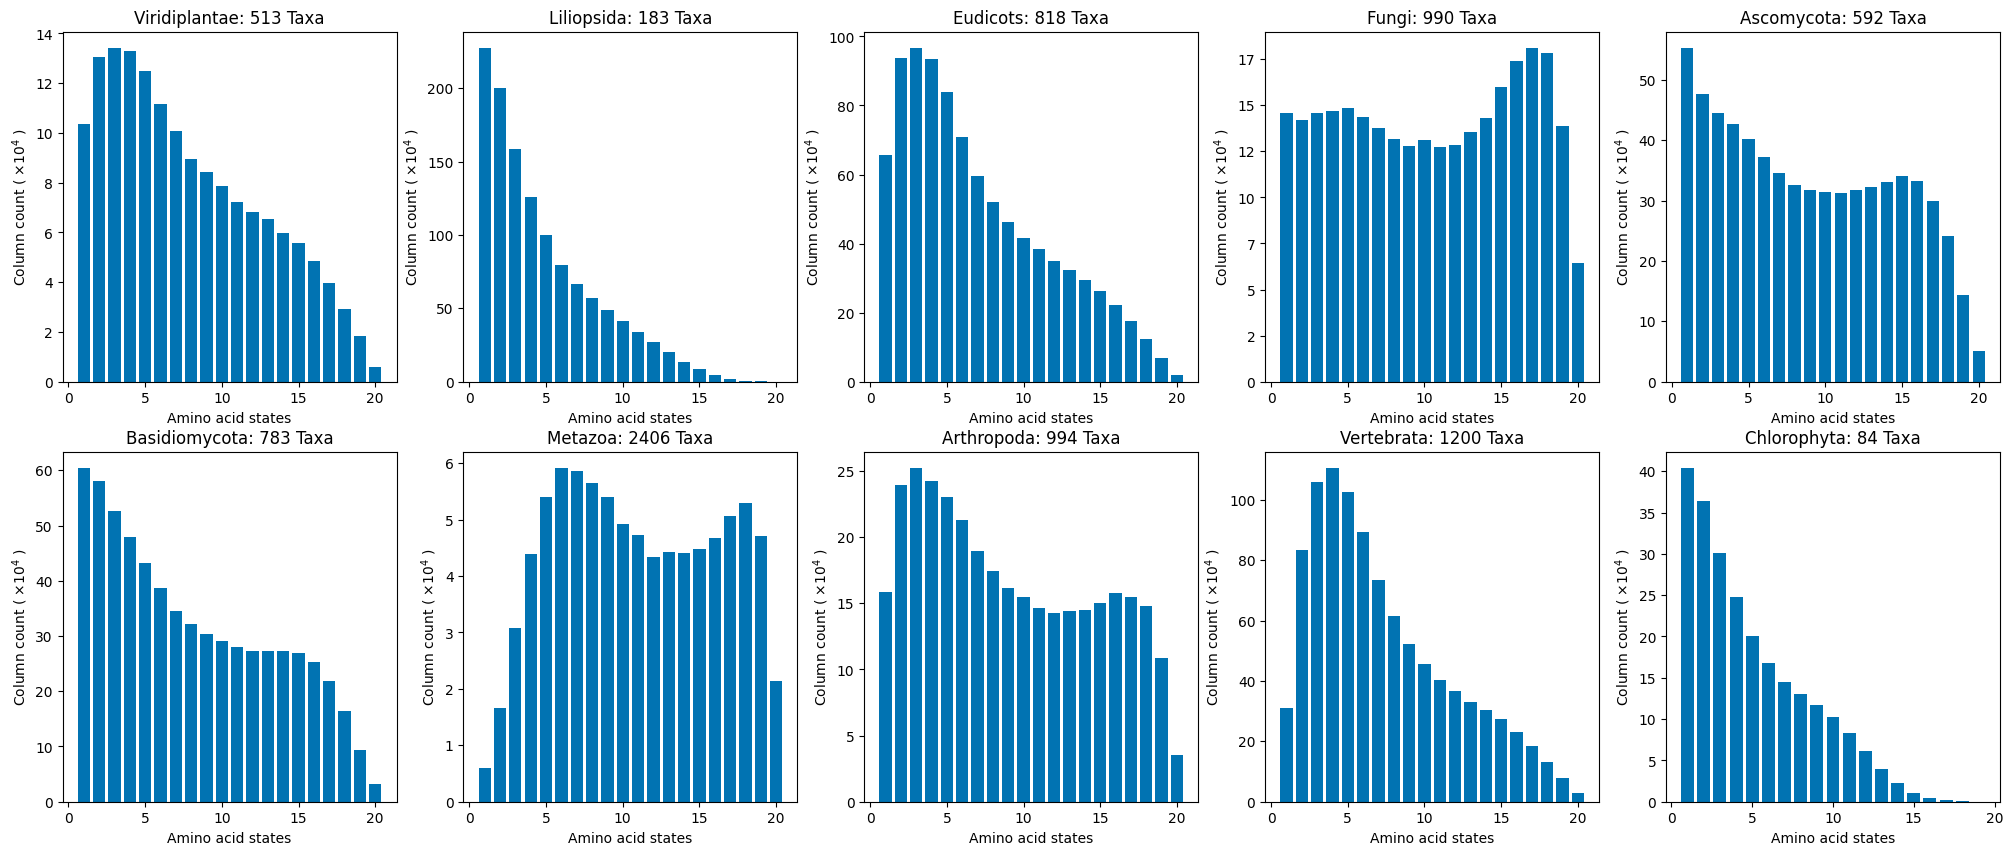

In [462]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

ax[0,0].bar(f1['unc'].value_counts().sort_index().index, f1['unc'].value_counts().sort_index().values)
ax[0,0].title.set_text("Viridiplantae: 513 Taxa")
_=ax[0,0].set_xlabel('Amino acid states')
_=ax[0,0].set_ylabel('Column count ( $×10^4$ )')
_=ax[0,0].set_yticklabels([int(int(x._text)/1000) for x in ax[0,0].get_yticklabels()], rotation = 0)

ax[0,1].bar(f2['unc'].value_counts().sort_index().index, f2['unc'].value_counts().sort_index().values)
ax[0,1].title.set_text("Liliopsida: 183 Taxa")
_=ax[0,1].set_xlabel('Amino acid states')
_=ax[0,1].set_ylabel('Column count ( $×10^4$ )')
_=ax[0,1].set_yticklabels([int(int(x._text)/1000) for x in ax[0,1].get_yticklabels()], rotation = 0)

ax[0,2].bar(f3['unc'].value_counts().sort_index().index, f3['unc'].value_counts().sort_index().values)
ax[0,2].title.set_text("Eudicots: 818 Taxa")
_=ax[0,2].set_xlabel('Amino acid states')
_=ax[0,2].set_ylabel('Column count ( $×10^4$ )')
_=ax[0,2].set_yticklabels([int(int(x._text)/1000) for x in ax[0,2].get_yticklabels()], rotation = 0)

ax[0,3].bar(f4['unc'].value_counts().sort_index().index, f4['unc'].value_counts().sort_index().values)
ax[0,3].title.set_text("Fungi: 990 Taxa")
_=ax[0,3].set_xlabel('Amino acid states')
_=ax[0,3].set_ylabel('Column count ( $×10^4$ )')
_=ax[0,3].set_yticklabels([int(int(x._text)/1000) for x in ax[0,3].get_yticklabels()], rotation = 0)

ax[0,4].bar(f5['unc'].value_counts().sort_index().index, f5['unc'].value_counts().sort_index().values)
ax[0,4].title.set_text("Ascomycota: 592 Taxa")
_=ax[0,4].set_xlabel('Amino acid states')
_=ax[0,4].set_ylabel('Column count ( $×10^4$ )')
_=ax[0,4].set_yticklabels([int(int(x._text)/1000) for x in ax[0,4].get_yticklabels()], rotation = 0)

ax[1,0].bar(f6['unc'].value_counts().sort_index().index, f6['unc'].value_counts().sort_index().values)
ax[1,0].title.set_text("Basidiomycota: 783 Taxa")
_=ax[1,0].set_xlabel('Amino acid states')
_=ax[1,0].set_ylabel('Column count ( $×10^4$ )')
_=ax[1,0].set_yticklabels([int(int(x._text)/1000) for x in ax[1,0].get_yticklabels()], rotation = 0)

ax[1,1].bar(f7['unc'].value_counts().sort_index().index, f7['unc'].value_counts().sort_index().values)
ax[1,1].title.set_text("Metazoa: 2406 Taxa")
_=ax[1,1].set_xlabel('Amino acid states')
_=ax[1,1].set_ylabel('Column count ( $×10^4$ )')
_=ax[1,1].set_yticklabels([int(int(x._text)/1000) for x in ax[1,1].get_yticklabels()], rotation = 0)

ax[1,2].bar(f8['unc'].value_counts().sort_index().index, f8['unc'].value_counts().sort_index().values)
ax[1,2].title.set_text("Arthropoda: 994 Taxa")
_=ax[1,2].set_xlabel('Amino acid states')
_=ax[1,2].set_ylabel('Column count ( $×10^4$ )')
_=ax[1,2].set_yticklabels([int(int(x._text)/1000) for x in ax[1,2].get_yticklabels()], rotation = 0)

ax[1,3].bar(f9['unc'].value_counts().sort_index().index, f9['unc'].value_counts().sort_index().values)
ax[1,3].title.set_text("Vertebrata: 1200 Taxa")
_=ax[1,3].set_xlabel('Amino acid states')
_=ax[1,3].set_ylabel('Column count ( $×10^4$ )')
_=ax[1,3].set_yticklabels([int(int(x._text)/1000) for x in ax[1,3].get_yticklabels()], rotation = 0)

ax[1,4].bar(f10['unc'].value_counts().sort_index().index, f10['unc'].value_counts().sort_index().values)
ax[1,4].title.set_text("Chlorophyta: 84 Taxa")
_=ax[1,4].set_xlabel('Amino acid states')
_=ax[1,4].set_ylabel('Column count ( $×10^4$ )')
_=ax[1,4].set_yticklabels([int(int(x._text)/1000) for x in ax[1,4].get_yticklabels()], rotation = 0)

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [ ]:
#alignments

In [412]:
ss1 = pd.read_csv('../r6/stratified/ss1.csv')
ss2 = pd.read_csv('../r6/stratified/ss2.csv')
ss3 = pd.read_csv('../r6/stratified/ss3.csv')
ss4 = pd.read_csv('../r6/stratified/ss4.csv')

In [413]:
ss1['ct'] = ss1['cf'].apply(lambda x: round(x*16/100))
ss2['ct'] = ss2['cf'].apply(lambda x: round(x*16/100))
ss3['ct'] = ss3['cf'].apply(lambda x: round(x*16/100))
ss4['ct'] = ss4['cf'].apply(lambda x: round(x*16/100))

/tmp/ipykernel_1090450/19628348.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,0].set_yticklabels([int(x/10000) for x in range(0,350000,50000)], rotation = 0)
/tmp/ipykernel_1090450/19628348.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,1].set_yticklabels([int(int(x._text)/1000) for x in ax[0,1].get_yticklabels()], rotation = 0)
/tmp/ipykernel_1090450/19628348.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,0].set_yticklabels([int(int(x._y)/1000) for x in ax[1,0].get_yticklabels()], rotation = 0)
/tmp/ipykernel_1090450/19628348.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,1].set_yticklabels([int(int(x._y

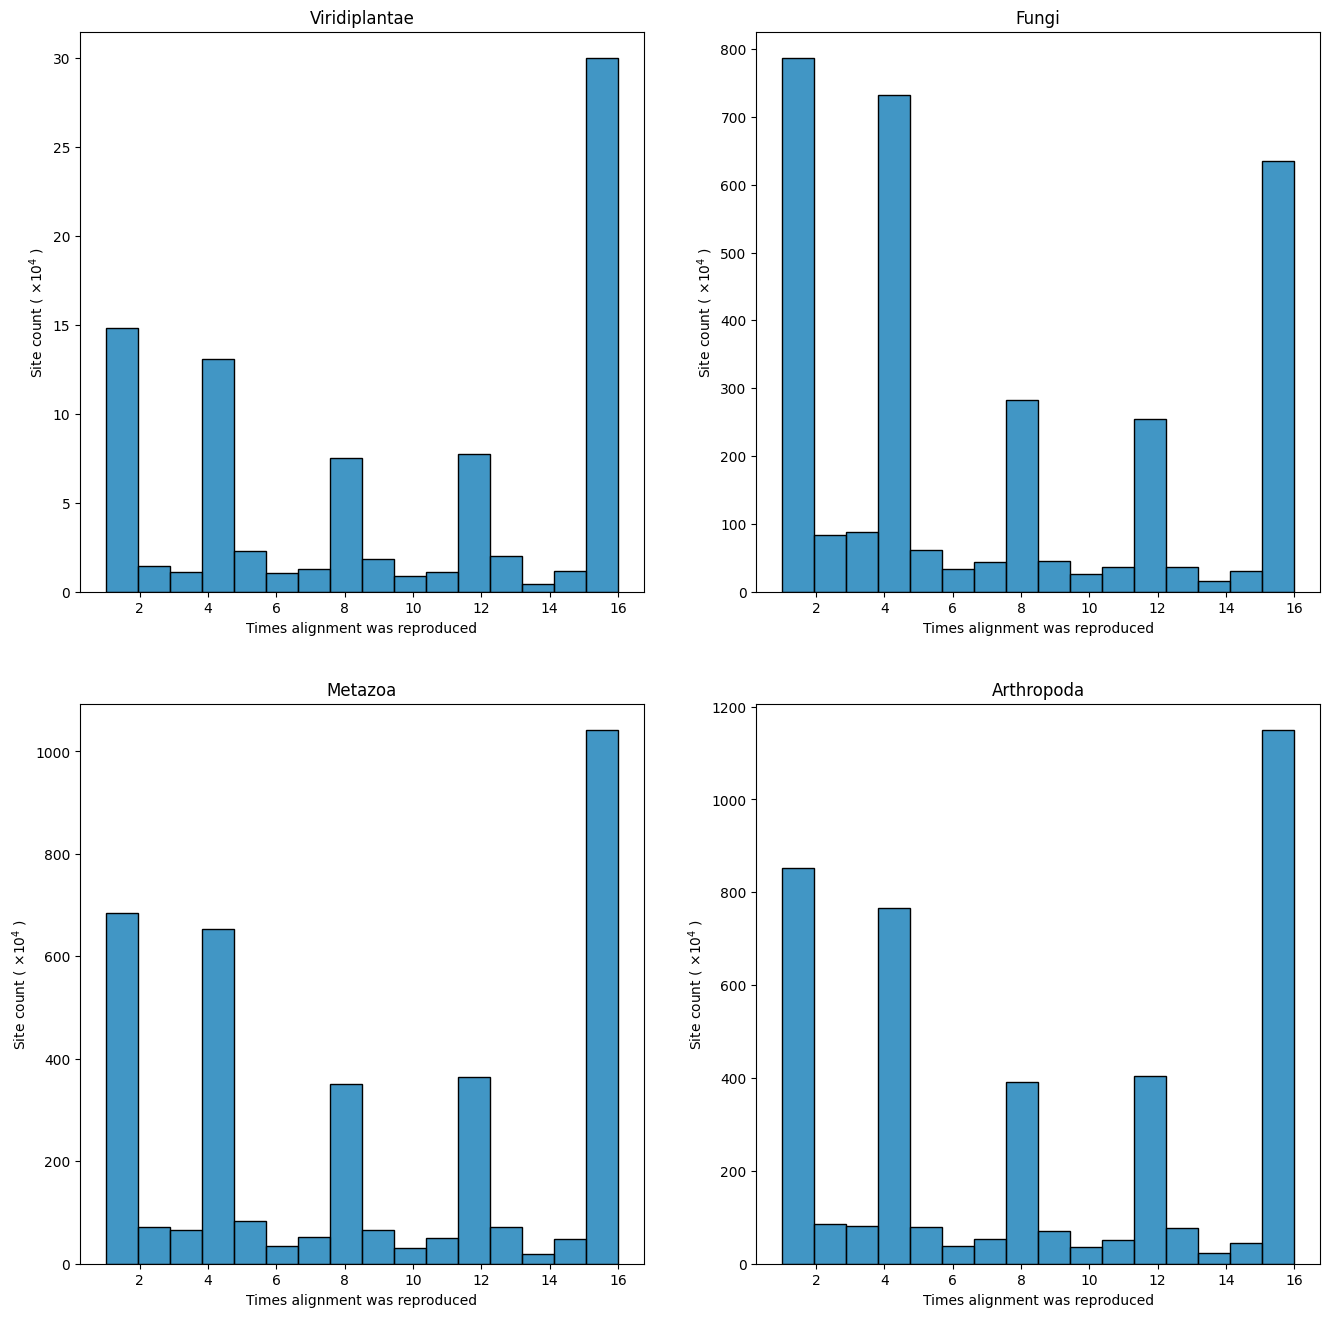

In [432]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
sns.histplot(ss1['ct'], bins = 16, ax = ax[0,0])
_=ax[0,0].set_title('Viridiplantae')
_=ax[0,0].set_xlabel('Times alignment was reproduced')
_=ax[0,0].set_ylabel('Site count ( $×10^4$ )')
_=ax[0,0].set_yticklabels([int(x/10000) for x in range(0,350000,50000)], rotation = 0)

sns.histplot(ss2['ct'], bins = 16, ax = ax[0,1])
_=ax[0,1].set_title('Fungi')
_=ax[0,1].set_xlabel('Times alignment was reproduced')
_=ax[0,1].set_ylabel('Site count ( $×10^4$ )')
_=ax[0,1].set_yticklabels([int(int(x._text)/1000) for x in ax[0,1].get_yticklabels()], rotation = 0)

sns.histplot(ss3['ct'], bins = 16, ax = ax[1,0])
_=ax[1,0].set_title('Metazoa')
_=ax[1,0].set_xlabel('Times alignment was reproduced')
_=ax[1,0].set_ylabel('Site count ( $×10^4$ )')
_=ax[1,0].set_yticklabels([int(int(x._y)/1000) for x in ax[1,0].get_yticklabels()], rotation = 0)

sns.histplot(ss4['ct'], bins = 16, ax = ax[1,1])
_=ax[1,1].set_title('Arthropoda')
_=ax[1,1].set_xlabel('Times alignment was reproduced')
_=ax[1,1].set_ylabel('Site count ( $×10^4$ )')
_=ax[1,1].set_yticklabels([int(int(x._y)/1000) for x in ax[1,1].get_yticklabels()], rotation = 0)

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [ ]:
#only count letters that occur at least twice

In [63]:
f1['unc2'] = f1.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f2['unc2'] = f2.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f3['unc2'] = f3.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f4['unc2'] = f4.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f5['unc2'] = f5.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f6['unc2'] = f6.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f7['unc2'] = f7.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f8['unc2'] = f8.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f9['unc2'] = f9.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)
f10['unc2']= f10.replace('-',np.nan).apply(lambda r: sum(r.dropna().value_counts() > 1), axis = 1)

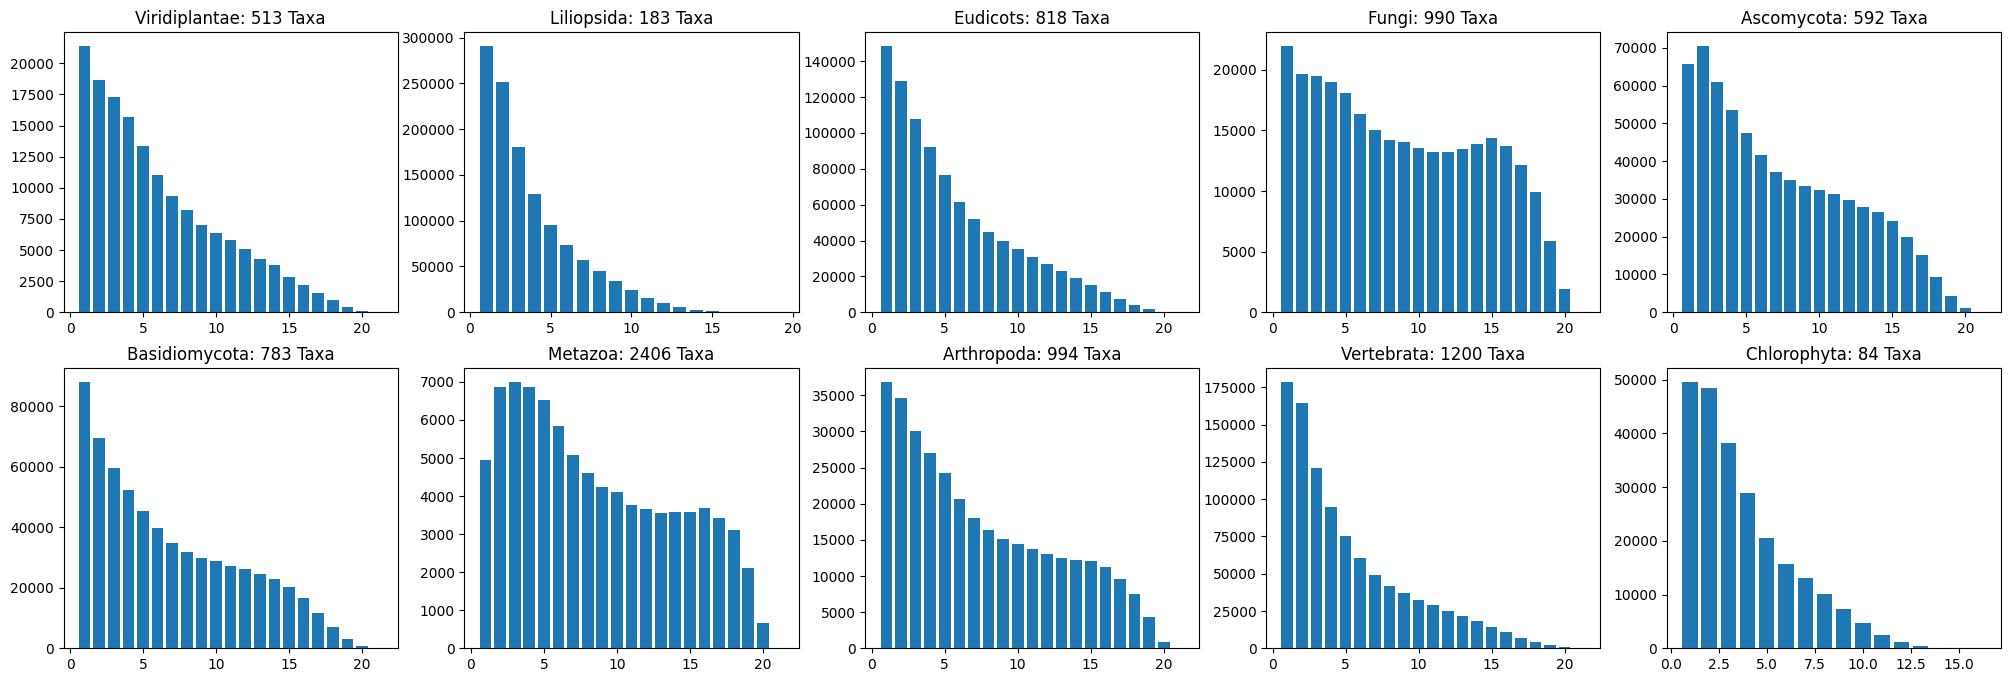

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 8))

ax[0,0].bar(f1['unc2'].value_counts().sort_index().index, f1['unc2'].value_counts().sort_index().values)
ax[0,0].title.set_text("Viridiplantae: 513 Taxa")

ax[0,1].bar(f2['unc2'].value_counts().sort_index().index, f2['unc2'].value_counts().sort_index().values)
ax[0,1].title.set_text("Liliopsida: 183 Taxa")

ax[0,2].bar(f3['unc2'].value_counts().sort_index().index, f3['unc2'].value_counts().sort_index().values)
ax[0,2].title.set_text("Eudicots: 818 Taxa")

ax[0,3].bar(f4['unc2'].value_counts().sort_index().index, f4['unc2'].value_counts().sort_index().values)
ax[0,3].title.set_text("Fungi: 990 Taxa")

ax[0,4].bar(f5['unc2'].value_counts().sort_index().index, f5['unc2'].value_counts().sort_index().values)
ax[0,4].title.set_text("Ascomycota: 592 Taxa")

ax[1,0].bar(f6['unc2'].value_counts().sort_index().index, f6['unc2'].value_counts().sort_index().values)
ax[1,0].title.set_text("Basidiomycota: 783 Taxa")

ax[1,1].bar(f7['unc2'].value_counts().sort_index().index, f7['unc2'].value_counts().sort_index().values)
ax[1,1].title.set_text("Metazoa: 2406 Taxa")

ax[1,2].bar(f8['unc2'].value_counts().sort_index().index, f8['unc2'].value_counts().sort_index().values)
ax[1,2].title.set_text("Arthropoda: 994 Taxa")

ax[1,3].bar(f9['unc2'].value_counts().sort_index().index, f9['unc2'].value_counts().sort_index().values)
ax[1,3].title.set_text("Vertebrata: 1200 Taxa")

ax[1,4].bar(f10['unc2'].value_counts().sort_index().index, f10['unc2'].value_counts().sort_index().values)
ax[1,4].title.set_text("Chlorophyta: 84 Taxa")

In [ ]:
#f3,f5,f6,f8,f9

In [304]:
d1 = pd.read_csv('../r7/viridiplantae/vp0/d10.tsv', sep = '\t')
d2 = pd.read_csv('../r7/liliopsida/li1/d7.tsv', sep = '\t')
d3 = pd.read_csv('../r7/eudicots/eu1/d1.tsv', sep = '\t')
d4 = pd.read_csv('../r7/fungi/fu1/d4.tsv', sep = '\t')
d5 = pd.read_csv('../r7/ascomycota/as1/d5.tsv', sep = '\t')
d6 = pd.read_csv('../r7/basidiomycota/ba1/d6.tsv', sep = '\t')
d7 = pd.read_csv('../r7/metazoa/me1/d9.tsv', sep = '\t')
d8 = pd.read_csv('../r7/arthropoda/ar1/d2.tsv', sep = '\t')
d9 = pd.read_csv('../r7/vertebrata/ve1/d3.tsv', sep = '\t')
d10= pd.read_csv('../r7/chlorophyta/ch2/d8.tsv', sep = '\t')

In [534]:
f1 = pd.read_csv('../r7/viridiplantae/vp0/pf10.tsv', sep = '\t')
f2 = pd.read_csv('../r7/liliopsida/li1/pf7.tsv', sep = '\t')
f3 = pd.read_csv('../r7/eudicots/eu1/pf1.tsv', sep = '\t')
f4 = pd.read_csv('../r7/fungi/fu1/pf4.tsv', sep = '\t')
f5 = pd.read_csv('../r7/ascomycota/as1/pf5.tsv', sep = '\t')
f6 = pd.read_csv('../r7/basidiomycota/ba1/pf6.tsv', sep = '\t')
f7 = pd.read_csv('../r7/metazoa/me1/pf9.tsv', sep = '\t')
f8 = pd.read_csv('../r7/arthropoda/ar1/pf2.tsv', sep = '\t')
f9 = pd.read_csv('../r7/vertebrata/ve1/pf3.tsv', sep = '\t')
f10= pd.read_csv('../r7/chlorophyta/ch2/pf8.tsv', sep = '\t')

In [85]:
def ef(d,f,n,s,r,p):
    #for i in range(2,s):
    for i in s:
        for i2 in range(r):
            t = f[f['unc'] == i].sample(n, axis = 0).iloc[:,:-4].apply(lambda c: ''.join(list(c))).reset_index()
            t[1] = t[0].apply(lambda x: x.count('-'))
            t = t[t[1] <= 0.25*n]
            t['index'] = t['index'].astype(int)
            t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
            t = pd.merge(t,t2)
            t['Tx'] = '>'+t['Tx']
            t[['Tx',0]].to_csv(p+'_{0}_{1}k_r{2}.afa'.format(i,int(n/1000),i2+1), sep = '\n', index = 0, header = None)

In [87]:
for i in [1000,5000,10000]:
    ef(d3,f3,i,[2,8,14],5,'/data2/scratch/cat/r6/tmr/eu')
    ef(d5,f5,i,[2,8,14],5,'/data2/scratch/cat/r6/tmr/as')
    ef(d6,f6,i,[2,8,14],5,'/data2/scratch/cat/r6/tmr/ba')
    ef(d8,f8,i,[2,8,14],5,'/data2/scratch/cat/r6/tmr/ar')
    ef(d9,f9,i,[2,8,14],5,'/data2/scratch/cat/r6/tmr/ve')

In [544]:
eff(d1,f1,'/data2/scratch/cat/r6/tst/vi')
eff(d2,f2,'/data2/scratch/cat/r6/tst/li')
eff(d3,f3,'/data2/scratch/cat/r6/tst/eu')
eff(d4,f4,'/data2/scratch/cat/r6/tst/fu')
eff(d5,f5,'/data2/scratch/cat/r6/tst/as')
eff(d6,f6,'/data2/scratch/cat/r6/tst/ba')
eff(d7,f7,'/data2/scratch/cat/r6/tst/me')
eff(d8,f8,'/data2/scratch/cat/r6/tst/ar')
eff(d9,f9,'/data2/scratch/cat/r6/tst/ve')
eff(d10,f10,'/data2/scratch/cat/r6/tst/ch')

In [543]:
#exp for final trees #let's do r14, r13&14, r8, r789, top5k,10k,20k & all for each.
def eff(d,f,p):
    #top 5k, 10k, 20k, 30k, 40k
    for al in [5000,10000,20000,30000,40000]:
        t = f.sort_values(['unc','gaps'], ascending = [0,1]).iloc[:al,:-3].apply(lambda c: ''.join(list(c))).reset_index()
        t[1] = t[0].apply(lambda x: x.count('-'))
        t = t[t[1] <= 0.25*al] #gap tolerance
        t['index'] = t['index'].astype(int)
        t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
        t = pd.merge(t,t2)
        t['Tx'] = '>'+t['Tx']
        t[['Tx',0]].to_csv(p+'top{0}k.afa'.format(int(al/1000)), sep = '\n', index = 0, header = None)
    
    # r14, r13&14, r8, r789. top 20k and all
    t = f[f['unc'] == 14].iloc[:,:-3].apply(lambda c: ''.join(list(c))).reset_index()
    sh = f[f['unc'] == 14].shape[0]
    t[1] = t[0].apply(lambda x: x.count('-'))
    t = t[t[1] <= 0.25*sh]
    t['index'] = t['index'].astype(int)
    t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
    t = pd.merge(t,t2)
    t['Tx'] = '>'+t['Tx']
    t[['Tx',0]].to_csv(p+'r14.afa', sep = '\n', index = 0, header = None)
    if sh > 20000:
        t = f[f['unc'] == 14].sort_values(['unc','gaps'], ascending = [0,1]).iloc[:20000,:-3].apply(lambda c: ''.join(list(c))).reset_index()
        t[1] = t[0].apply(lambda x: x.count('-'))
        t = t[t[1] <= 0.25*20000]
        t['index'] = t['index'].astype(int)
        t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
        t = pd.merge(t,t2)
        t['Tx'] = '>'+t['Tx']
        t[['Tx',0]].to_csv(p+'r14l20k.afa', sep = '\n', index = 0, header = None)

    t = f[f['unc'] == 8].iloc[:,:-3].apply(lambda c: ''.join(list(c))).reset_index()
    sh = f[f['unc'] == 8].shape[0]
    t[1] = t[0].apply(lambda x: x.count('-'))
    t = t[t[1] <= 0.25*sh]
    t['index'] = t['index'].astype(int)
    t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
    t = pd.merge(t,t2)
    t['Tx'] = '>'+t['Tx']
    t[['Tx',0]].to_csv(p+'r8.afa', sep = '\n', index = 0, header = None)
    if sh > 20000:
        t = f[f['unc'] == 8].sort_values(['unc','gaps'], ascending = [0,1]).iloc[:20000,:-3].apply(lambda c: ''.join(list(c))).reset_index()
        t[1] = t[0].apply(lambda x: x.count('-'))
        t = t[t[1] <= 0.25*20000]
        t['index'] = t['index'].astype(int)
        t2 = pd.DataFrame(d.columns[1:], columns=['Tx']).reset_index()
        t = pd.merge(t,t2)
        t['Tx'] = '>'+t['Tx']
        t[['Tx',0]].to_csv(p+'r8l20k.afa', sep = '\n', index = 0, header = None)

In [ ]:
#check tsttrees

In [71]:
tz1 = pd.read_csv('../r6/amp/gc3.an', sep = ' ', header = None )
tz1 = tz1[tz1[2].apply(lambda x: x[:2] != '__')]
tz1 = tz1[tz1.duplicated([0,1],keep = 0)]
tz1[4] = tz1[0].apply(lambda x: x[:2])
tz1[5] = tz1[0].apply(lambda x: x[2:])
tz2 = tz1.groupby([0,1])[2].apply(set).apply(sorted).reset_index()
tz2[3] = tz2[2].astype(str)
tz2[4] = tz2[0].apply(lambda x: x[:2])
tz2[5] = tz2[0].apply(lambda x: x[2:8])

In [82]:
tz2.groupby([4,5])[3].nunique()

4   5     
ar  r14.te     825
    r8.tem     489
    top20k     404
    top30k     391
    top40k     385
as  r14.te     214
    r8.tem     226
    top20k     215
    top30k     204
    top40k     204
ba  r14.te     295
    r8.tem     303
    top20k     289
    top30k     286
    top40k     278
ch  r14.te      39
    r8.tem      28
    top20k      30
    top30k      29
    top40k      27
eu  r14.te     324
    r8.tem     327
    top20k     340
    top30k     323
    top40k     307
fu  r14.te     411
    r8.tem     453
    top20k     373
    top30k     369
    top40k     367
li  r14.te      66
    r8.tem      60
    top20k      65
    top30k      63
    top40k      62
me  r14.te    1935
    r8.tem    2445
    top20k    1132
ve  r14.te     513
    r8.tem     561
    top20k     527
    top30k     501
    top40k     498
vi  r14.te     216
    r8.tem     239
    top20k     174
    top30k     174
    top40k     169
Name: 3, dtype: int64

In [ ]:
a1 = pd.read_csv('../r6/g3.an', sep = ' ', header = None )
a1 = a1[a1[2].isin(bn.leaves(l1) + bn.leaves(l2) + bn.leaves(l3) + bn.leaves(l4) + bn.leaves(l5))]
a1 = a1[a1.duplicated([0,1],keep = 0)]
a1[4] = a1[0].apply(lambda x: x.split('_')[0])
a1[5] = a1[0].apply(lambda x: x.split('_')[1])
a1[6] = a1[0].apply(lambda x: x.split('_')[2].replace('k','000'))
a1[7] = a1[0]+'_'+a1[1].astype(str)
a2 = a1.groupby(7)[2].apply(set).apply(sorted).reset_index()
a2[3] = a2[7].apply(lambda x: x.split('_')[0])
a2[4] = a2[7].apply(lambda x: x.split('_')[1])
a2[5] = a2[7].apply(lambda x: x.split('_')[2].replace('k','000'))
a2[6] = a2[2].astype(str)
a2[4] = a2[4].astype(int)
a2[5] = a2[5].astype(int)

In [ ]:
#treefiles 

In [99]:
t = []
for i in os.listdir('../r6/tm3/'):
    if i[-9:] == 'treefile' or i[-3:] == 'log' or i[-6:] == 'iqtree':
        t.append(i)

In [100]:
fd = pd.DataFrame(t)

In [101]:
fd[1] = fd[0].apply(lambda x: x.split('_')[0])
fd[2] = fd[0].apply(lambda x: x.split('_')[1])
fd[3] = fd[0].apply(lambda x: x.split('_')[2])
fd[4] = fd[0].apply(lambda x: x.split('.')[-1])
fd[5] = fd[0].apply(lambda x: '.'.join(x.split('.')[:-1]))

In [418]:
fd.pivot(index = 5, columns = 4, values = 0).rename_axis(None, axis=0).rename_axis(None, axis=1).reset_index(drop = 1)#.to_csv('../r6/c3.f', index = 0, sep = '\t')

In [102]:
fd = fd.pivot(index = 5, columns = 4, values = 0).rename_axis(None, axis=0).rename_axis(None, axis=1)#.reset_index(drop = 1)

In [ ]:
#model extraction

In [107]:
t = []
for i in fd[~fd.isna().any(axis = 1)]['iqtree']:
    with open('../r6/tm3/'+i, 'r') as f:
        for l in f:
            if l[:8] == 'Best-fit':
                w = l.split(': ')[1][:-1]
    t.append((i,w))

In [108]:
md = pd.DataFrame(t)

In [110]:
md[2] = md[0].apply(lambda x: x.split('_')[0])
md[3] = md[0].apply(lambda x: x.split('_')[1])
md[4] = md[0].apply(lambda x: x.split('_')[2].split('.')[0])

In [111]:
md[5] = md[2]+'_'+md[3]

In [112]:
md[4] = md[4].astype(int)

In [113]:
copyDF(md.sort_values(4).pivot(index = 5, columns = 4, values = 1))

<IPython.core.display.Javascript object>

In [ ]:
#model comps

In [562]:
k1 = pd.read_csv('../r6/t5o.mf', sep = '\t', header = None)
k1['Lineage'] = k1[0].apply(lambda x: x.split('_')[0])
k1['Rate'] = k1[0].apply(lambda x: x.split('_')[1])
k1['Sites'] = k1[0].apply(lambda x: x.split('_')[2].split('.')[0])
k1['Model'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[0])
k1['LogL'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[1])
k1['AIC'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[2])
k1['AICc'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[5])
k1['BIC'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[8])
k1['w-BIC'] = k1[1].apply(lambda x: ' '.join(x.split()).split(' ')[9])

In [564]:
copyDF(k1.iloc[:,2:])

<IPython.core.display.Javascript object>

In [ ]:
#tree assessment. %monophyly computation time

In [383]:
m1 = pd.read_csv('../r7/arthropoda/m2c.tsv', sep = '\t')
m2 = pd.read_csv('../r7/ascomycota/m2b.tsv', sep = '\t')
m3 = pd.read_csv('../r7/basidiomycota/m3b.tsv', sep = '\t')
m4 = pd.read_csv('../r7/eudicots/m4a.tsv', sep = '\t')
m5 = pd.read_csv('../r7/vertebrata/m3c.tsv', sep = '\t')

In [529]:
def mnp(m,l):
    t1 = pd.DataFrame(bn.leaves(l))
    t1 = pd.merge(t1,m[['on','phylum','class','order','family','genus']], left_on=0, right_on='on', how = 'left')
    t,y,u = [],[],[]
    for lv in ['family', 'order','class']:
        r = t1.loc[t1[lv] == t1[lv].value_counts().index[-1], 'on'].iloc[0] #root taxon 
        t2 = fill_unc(t1) #fill unclassified        
        r = root_at(l,r)
        
        for on,f in t1[['on',lv]].values:
            r = r.replace(on+':',f+':')

        c = bn.nodes_w_all_descendants(r)[2]
        vcf = t2[lv].value_counts()    
        n = 0
        for i in set(list(zip(*bn.nodes_w_all_descendants(r)[1]))[0]):
            if (len(set(c['__'+str(i)])) == 1) and (len(c['__'+str(i)]) == vcf.loc[c['__'+str(i)][0]]):
                n+=1
                y.append((lv, c['__'+str(i)][0], len(c['__'+str(i)][0])))
                #print(lv.capitalize(), c['__'+str(i)][0], 'is monophyletic.')
        
        m = len(vcf.drop(t2[lv].value_counts().index[-1])[vcf.drop(t2[lv].value_counts().index[-1]) > 1])        
        t.append((lv, n,m))
        
        #remove monophyletic taxa and singleton taxa and save the tree
        t2.loc[t2['family'].isin(set(list(zip(*y))[1])), 'status'] = 'm'
        t2.loc[t2['family'].isin(vcf.drop(t2[lv].value_counts().index[-1])[vcf.drop(t2[lv].value_counts().index[-1]) == 1].index), 'status'] = 's'

        
        u.append(bn.extract_subtree(l,t2[t2['family'].isnull()]['on'].to_list()))

    with open('.'.join(sys.argv[1].split('.')[:-1])+'.3t','w') as f:
        for i in u:
            f.write(u)
            f.write('\n')
    return t
    
def root_at(tree,taxon):
    a,b = bn.recur_nw_pd(tree,len(bn.leaves(tree)),[])
    d = pd.DataFrame(b)
    i = d.loc[d[1] == taxon,0].iloc[0] #new root    
    tb = bn.encode_leaves(tree,b)
    return bn.recur_pd_nw('%016.10f' % i, bn.trail(bn.reasign(bn.swap_root(tb,i),tree)))

def fill_unc(df):
    for c in ['phylum','class','order','family','genus']:
        n=1
        for i,v in df.loc[:,c].items():
            if pd.isna(df.loc[i,c]):
                df.loc[i,c] = 'unc'+str(n).zfill(2)
                n+=1
    return df

In [ ]:
t = []
for i in fd['treefile'].iloc[1078:].dropna():
    with open('../r6/tm3/'+i,'r') as f:
        l = f.readline()[:-1]
    if i.split('_')[0] == 'ar':
        m = m1.copy()
    elif i.split('_')[0] == 'as':
        m = m2.copy()
    elif i.split('_')[0] == 'ba':
        m = m3.copy()
    elif i.split('_')[0] == 'eu':
        m = m4.copy()
    elif i.split('_')[0] == 've':
        m = m5.copy()

    t.append(mnp(m,l))
    

In [310]:
h1 = pd.read_csv('../r6/c4p.an', sep = '\t', header = None)

In [311]:
h1[2] = h1[0].apply(lambda x: x.split('_')[0]+'_'+x.split('_')[2].split('.')[0].zfill(5))
h1[3] = h1[0].apply(lambda x: x.split('_')[1].zfill(2))
h1[4] = h1[1].apply(lambda x: x.split(',')[2].strip()).astype(float)
h1[5] = h1[1].apply(lambda x: x.split(',')[3].replace(')','').strip()).astype(float)
h1[6] = h1[1].apply(lambda x: x.split(',')[6].strip()).astype(float)
h1[7] = h1[1].apply(lambda x: x.split(',')[7].replace(')','').strip()).astype(float)
h1[8] = h1[1].apply(lambda x: x.split(',')[10].strip()).astype(float)
h1[9] = h1[1].apply(lambda x: x.split(',')[11].replace(')','').replace(']','').strip()).astype(float)
h1[11] = h1[0].apply(lambda x: x.split('_')[0])

In [312]:
h1.loc[(h1[3].astype(int) >= 2) & (h1[3].astype(int) <= 8),'g1'] = '2to8'
h1.loc[(h1[3].astype(int) >= 10) & (h1[3].astype(int) <= 16),'g1'] = '10to16'
h1.loc[(h1[3].astype(int) >= 3) & (h1[3].astype(int) <= 9),'g2'] = '3to9'
h1.loc[(h1[3].astype(int) >= 10) & (h1[3].astype(int) <= 16),'g2'] = '10to16'

In [313]:
h1[12] = h1[2].apply(lambda x: int(x.split('_')[1]))

In [122]:
copyDF(h1)

<IPython.core.display.Javascript object>

In [314]:
h2 =  pd.read_csv('../r6/b3p.an', sep = '\t', header = None)
h2[2] = h2[0].apply(lambda x: x.split('_')[0]+'_'+x.split('_')[2].split('.')[0].replace('k','000').zfill(5))
h2[3] = h2[0].apply(lambda x: x.split('_')[1].zfill(2))
h2[4] = h2[1].apply(lambda x: x.split(',')[2].strip()).astype(float)
h2[5] = h2[1].apply(lambda x: x.split(',')[3].replace(')','').strip()).astype(float)
h2[6] = h2[1].apply(lambda x: x.split(',')[6].strip()).astype(float)
h2[7] = h2[1].apply(lambda x: x.split(',')[7].replace(')','').strip()).astype(float)
h2[8] = h2[1].apply(lambda x: x.split(',')[10].strip()).astype(float)
h2[9] = h2[1].apply(lambda x: x.split(',')[11].replace(')','').replace(']','').strip()).astype(float)
h2[11]= h2[0].apply(lambda x: x.split('_')[0])
h2[12] = h2[2] +'_'+ h2[3]
h2[13] = h2[2].apply(lambda x: int(x.split('_')[1]))
h2[14] = h2[13].astype(str)+'_'+h2[3]

In [315]:
#rate-wise families on bulk trees
f1 = pd.read_csv('../r6/f3.an', header = None, sep = ' ')
f1[3] = f1[0].apply(lambda x: x.split('_')[0])
f1[4] = f1[0].apply(lambda x: x.split('_')[1])
f1[5] = f1[0].apply(lambda x: x.split('_')[2])

In [831]:
#likelihood correlation
l1 = pd.read_csv('../r6/g3p.li', sep = '\t', header = None)
l1[2] = l1[0].apply(lambda x: '_'.join(x.split('_')[:-1]))
l1[3] = l1[1].apply(lambda x: float(x.split(': ')[1].split(' (')[0]))
li = l1.groupby(2)[3].mean().reset_index().rename(columns = {2: 0, 3: 41})
l2 = pd.merge(h2,li)
l21 = l2[l2[11] == 'ar']
l22 = l2[l2[11] == 'as']
l23 = l2[l2[11] == 'ba']
l24 = l2[l2[11] == 've']

In [438]:
#coa vs conc
h4 = pd.read_csv('../r6/e3p.an', sep = '\t', header = None)
h4[2] = h4[0].apply(lambda x: x[:2])
h4[3] = h4[1].apply(lambda x: int(x.split(',')[2].strip()))
h4[4] = h4[0].apply(lambda x: int(x[2:4]))
h2[33] = np.nan
h2[34] = np.nan
h2.loc[h2[h2[11] == 'eu'].iloc[0:14].index, 33] = h4.iloc[0:14,3].values
h2.loc[h2[h2[11] == 'eu'].iloc[0:14].index, 34] = h4.iloc[0:14,4].values
h2.loc[h2[h2[11] == 'ar'].iloc[0:14].index, 33] = h4.iloc[15:29,3].values
h2.loc[h2[h2[11] == 'ar'].iloc[0:14].index, 34] = h4.iloc[15:29,4].values
h2.loc[h2[h2[11] == 've'].iloc[0:14].index, 33] = h4.iloc[30:44,3].values
h2.loc[h2[h2[11] == 've'].iloc[0:14].index, 34] = h4.iloc[30:44,4].values
h4[35] = 'Coalescent'
h2[35] = 'Concatenated'
h5 = pd.concat([h2[(h2[11] != 'as') & (h2[11] != 'ba') & (h2[3] == '08') & (h2[13] == 5000)],h4.rename(columns = {0:0,1:1,2:11,3:4,4:34})], axis = 0)

/tmp/ipykernel_1920205/3023474232.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1920205/3023474232.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1920205/3023474232.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,1].set_xticklabels(['1K','5K','10K'], rotation = 0)
/tmp/ipykernel_1920205/3023474232.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,2].set_xticklabels(['1K','5K','10K'], rotation = 0)


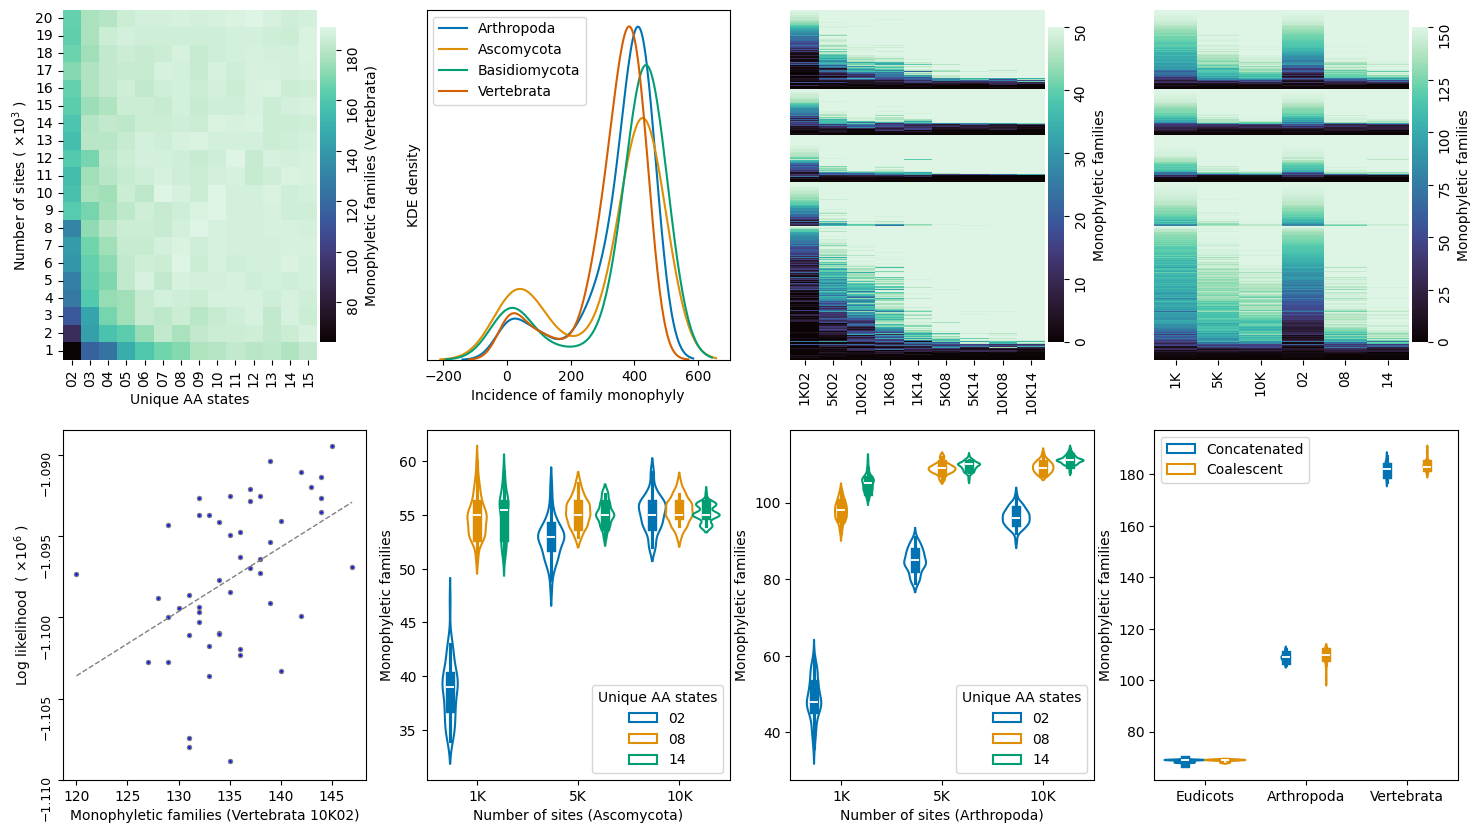

In [325]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

sp = sns.heatmap(h1[(h1[11] == 've') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=False,# vmin=50, vmax=210,
            cbar_kws={'label': 'Monophyletic families (Vertebrata)',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,0])

_=ax[0,0].set_xlabel('Unique AA states')
_=ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation = 90)
_=ax[0,0].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[0,0].set_yticklabels([int(int(x._text)/1000) for x in ax[0,0].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
#cbar.set_ticks(range(60,220,20))
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

sns.kdeplot(pd.Series(f1[f1[3] == 'ar'].value_counts(1)), ax = ax[0,1])
sns.kdeplot(pd.Series(f1[f1[3] == 'as'].value_counts(1)), ax = ax[0,1])
sns.kdeplot(pd.Series(f1[f1[3] == 'ba'].value_counts(1)), ax = ax[0,1])
sns.kdeplot(pd.Series(f1[f1[3] == 've'].value_counts(1)), ax = ax[0,1])
ax[0,1].legend(["Arthropoda", "Ascomycota", "Basidiomycota", "Vertebrata"])

_=ax[0,1].set_xlabel('Incidence of family monophyly')
#ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_ylabel("KDE density")
ax[0,1].set_yticks([])
#ax[0,1].set_xlim(0,650)

sp = sns.heatmap(fx[['2_01000','2_05000','2_10000','8_01000','14_01000','8_05000','14_05000','8_10000','14_10000']].fillna(0), cmap = 'mako', annot=False,
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,2])

_=ax[0,2].set_xlabel('')
_=ax[0,2].set_xticklabels(['1K02', '5K02', '10K02', '1K08', '1K14', '5K08','5K14','10K08','10K14'], rotation = 90)#, font = 'monospace')
_=ax[0,2].set_ylabel('')
_=ax[0,2].set_yticks([])#, font = 'monospace')
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


sp = sns.heatmap(fx[[1000,5000,10000,'2','8','14']].fillna(0), cmap = 'mako', annot=False,
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,3])

_=ax[0,3].set_xlabel('')
_=ax[0,3].set_xticklabels(['1K', '5K', '10K', '02', '08', '14'], rotation = 90)#, font = 'monospace')
_=ax[0,3].set_ylabel('')
_=ax[0,3].set_yticks([])#, font = 'monospace')
cbar = sp.collections[0].colorbar
cbar.set_ticks(range(0,175,25))
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

sns.regplot(x=l24[(l24[3] == '02') & (l24[13] == 10000)][4], y=l24[(l24[3] == '02')& (l24[13] == 10000)][41], ci = None, ax = ax[1,0],
                scatter_kws={'s':8, "color":"blue", "edgecolors":'grey'},  line_kws={"ls": '--', "color" : "grey", "linewidth":1}) 

_=ax[1,0].set_yticks(ax[1,0].get_yticks()[::2])
_=ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(), rotation = 90)
_=ax[1,0].tick_params(axis='y', which='major', labelsize=9)
_=ax[1,0].set_ylabel('Log likelihood  ( $×10^6$ )')
_=ax[1,0].set_xlabel('Monophyletic families (Vertebrata 10K02)')

#sns.violinplot(data=h2[h2[11] == 'eu'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[0,2])
sns.violinplot(data=h2[h2[11] == 'as'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[1,1])
#sns.violinplot(data=h2[h2[11] == 'ba'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[1,2])
sns.violinplot(data=h2[h2[11] == 'ar'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[1,2])
#sns.violinplot(data=h2[h2[11] == 've'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[2,1])

_=ax[1,1].set_xlabel('Number of sites (Ascomycota)')
_=ax[1,1].set_xticklabels(['1K','5K','10K'], rotation = 0)
_=ax[1,1].set_ylabel('Monophyletic families')
#_=ax[0,3].set_yticklabels(ax[0,3].get_yticklabels(), rotation = 90)
_=ax[1,1].legend([ax[1,2].get_children()[0], ax[1,2].get_children()[4], ax[1,2].get_children()[8]], ['02','08','14'],title="Unique AA states")

_=ax[1,2].set_xlabel('Number of sites (Arthropoda)')
_=ax[1,2].set_xticklabels(['1K','5K','10K'], rotation = 0)
_=ax[1,2].set_ylabel('Monophyletic families')
#_=ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(), rotation = 90)
_=ax[1,2].legend([ax[1,2].get_children()[0], ax[1,2].get_children()[4], ax[1,2].get_children()[8]], ['02','08','14'],title="Unique AA states")

sns.violinplot(data=h5, x=11, y=4, hue=35, fill=False, ax = ax[1,3])
#sns.boxplot(data=h5, x=11, y=36, hue=35, fill=False, ax = ax[1,3])
#sns.swarmplot(data=h5, x=11, y=36, hue=35, ax = ax[1,3])

_=ax[1,3].set_xlabel('')
_=ax[1,3].set_xticks(ticks = ['eu','ar','ve'], labels = ["Eudicots", "Arthropoda", "Vertebrata"])
_=ax[1,3].set_ylabel('Monophyletic families')
#_=ax[1,3].set_yticklabels(ax[1,3].get_yticklabels(), rotation = 90)
_=ax[1,3].legend(title="")

#plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [ ]:
#tree comparison results

In [339]:
qsd = pd.DataFrame()
for i in os.listdir('../r6/'):
    if len(i) < 5:
        continue
    if i[-4:] == '.cmp':
        tdf = pd.read_csv('../r6/{0}'.format(i), sep = '\t')
        tdf['file'] = i
        qsd = pd.concat([qsd,tdf], axis=0).reset_index(drop = 1)

In [345]:
#qsd.pivot(index = 'file', columns = 'Tree', values = 'R-F').transpose()
qsd['l'] = qsd['file'].apply(lambda x: x.split('_')[0])
qsd['ua'] = qsd['file'].apply(lambda x: x[3:-4])

In [350]:
qsd['lt'] = qsd['l']+'_'+qsd['Tree'].astype(str)

In [516]:
qsd

,Tree,Tree_taxa,RefTree_taxa,Common_taxa,MatchingSplit,R-F,PathDiffernce,Quartet,file,l,ua,lt
0,1,1199,1198,1198,35563.0,693.0,45469.7313,2.500081e+10,ve_2_1k.cmp,ve,2_1k,ve_1
1,2,1199,1198,1198,40260.0,692.0,51496.6489,2.446847e+10,ve_2_1k.cmp,ve,2_1k,ve_2
2,3,1199,1198,1198,56266.0,692.0,73440.3545,2.702366e+10,ve_2_1k.cmp,ve,2_1k,ve_3
3,4,1199,1198,1198,33680.0,691.0,42721.9767,2.555036e+10,ve_2_1k.cmp,ve,2_1k,ve_4
4,5,1199,1198,1198,39800.0,692.0,52056.2821,2.461389e+10,ve_2_1k.cmp,ve,2_1k,ve_5
...,...,...,...,...,...,...,...,...,...,...,...,...
2245,46,1199,1198,1198,23010.0,557.0,29521.3583,2.530378e+10,ve_2_10k.cmp,ve,2_10k,ve_46
2246,47,1199,1198,1198,19984.0,560.0,25784.1984,2.383104e+10,ve_2_10k.cmp,ve,2_10k,ve_47
2247,48,1199,1198,1198,21794.0,562.0,28390.4678,2.292251e+10,ve_2_10k.cmp,ve,2_10k,ve_48
2248,49,1199,1198,1198,19315.0,560.0,25475.5903,2.278490e+10,ve_2_10k.cmp,ve,2_10k,ve_49


In [518]:
qsdtm = qsd.groupby('l')['R-F'].mean().reset_index().rename(columns = {'R-F':'R-F_mean'})
qsdts = qsd.groupby('l')['R-F'].std().reset_index().rename(columns = {'R-F':'R-F_std'})

qsdum = qsd.groupby('l')['MatchingSplit'].mean().reset_index().rename(columns = {'MatchingSplit':'ms_mean'})
qsdus = qsd.groupby('l')['MatchingSplit'].std().reset_index().rename(columns = {'MatchingSplit':'ms_std'})

qsdvm = qsd.groupby('l')['PathDiffernce'].mean().reset_index().rename(columns = {'PathDiffernce':'pd_mean'})
qsdvs = qsd.groupby('l')['PathDiffernce'].std().reset_index().rename(columns = {'PathDiffernce':'pd_std'})

qsdwm = qsd.groupby('l')['Quartet'].mean().reset_index().rename(columns = {'Quartet':'qt_mean'})
qsdws = qsd.groupby('l')['Quartet'].std().reset_index().rename(columns = {'Quartet':'qt_std'})

In [521]:
qse = pd.merge(pd.merge(qsd,qsdtm),qsdts)
qse = pd.merge(pd.merge(qse,qsdum),qsdus)
qse = pd.merge(pd.merge(qse,qsdvm),qsdvs)
qse = pd.merge(pd.merge(qse,qsdwm),qsdws)

In [522]:
qse['R-F_standardized'] = (qse['R-F']-qse['R-F_mean']).div(qse['R-F_std'])
qse['ms_standardized'] = (qse['MatchingSplit']-qse['ms_mean']).div(qse['ms_std'])
qse['pd_standardized'] = (qse['PathDiffernce']-qse['pd_mean']).div(qse['pd_std'])
qse['qt_standardized'] = (qse['Quartet']-qse['qt_mean']).div(qse['qt_std'])

In [368]:
qsf = qse.sort_values(['l','R-F_standardized']).pivot(index = 'ua', columns = 'lt', values = 'R-F_standardized').transpose()

In [403]:
qc1 = qsf['2_1k'].reset_index()
qc1['l'] = qc1['lt'].apply(lambda x: x.split('_')[0])
qc1 = qc1.sort_values(['l','2_1k']).reset_index(drop=1)

qc2 = qsf['2_5k'].reset_index()
qc2['l'] = qc2['lt'].apply(lambda x: x.split('_')[0])
qc2 = qc2.sort_values(['l','2_5k']).reset_index(drop=1)

qc3 = qsf['2_10k'].reset_index()
qc3['l'] = qc3['lt'].apply(lambda x: x.split('_')[0])
qc3 = qc3.sort_values(['l','2_10k']).reset_index(drop=1)

qc4 = qsf['8_1k'].reset_index()
qc4['l'] = qc4['lt'].apply(lambda x: x.split('_')[0])
qc4 = qc4.sort_values(['l','8_1k']).reset_index(drop=1)

qc5 = qsf['8_5k'].reset_index()
qc5['l'] = qc5['lt'].apply(lambda x: x.split('_')[0])
qc5 = qc5.sort_values(['l','8_5k']).reset_index(drop=1)

qc6 = qsf['8_10k'].reset_index()
qc6['l'] = qc6['lt'].apply(lambda x: x.split('_')[0])
qc6 = qc6.sort_values(['l','8_10k']).reset_index(drop=1)

qc7 = qsf['14_1k'].reset_index()
qc7['l'] = qc7['lt'].apply(lambda x: x.split('_')[0])
qc7 = qc7.sort_values(['l','14_1k']).reset_index(drop=1)

qc8 = qsf['14_5k'].reset_index()
qc8['l'] = qc8['lt'].apply(lambda x: x.split('_')[0])
qc8 = qc8.sort_values(['l','14_5k']).reset_index(drop=1)

qc9 = qsf['14_10k'].reset_index()
qc9['l']= qc9['lt'].apply(lambda x: x.split('_')[0])
qc9 = qc9.sort_values(['l','14_10k']).reset_index(drop=1)

In [774]:
qse['u'] = qse['ua'].apply(lambda x: x.split('_')[0])
qse['a'] = qse['ua'].apply(lambda x: int(x.split('_')[1][:-1]))

In [ ]:
l2df = pd.DataFrame()
for i in os.listdir('../r6/tmc/'):
    if i[-3:] == '.mp':
        tdf = pd.read_csv('../r6/tmc/{0}'.format(i), sep = '\t')
        tdf[0] = i[:-3]
        l2df = pd.concat([l2df,tdf],axis=0)

In [837]:
l24 = pd.merge(l24,l2df)

/tmp/ipykernel_1920205/827417343.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1920205/827417343.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


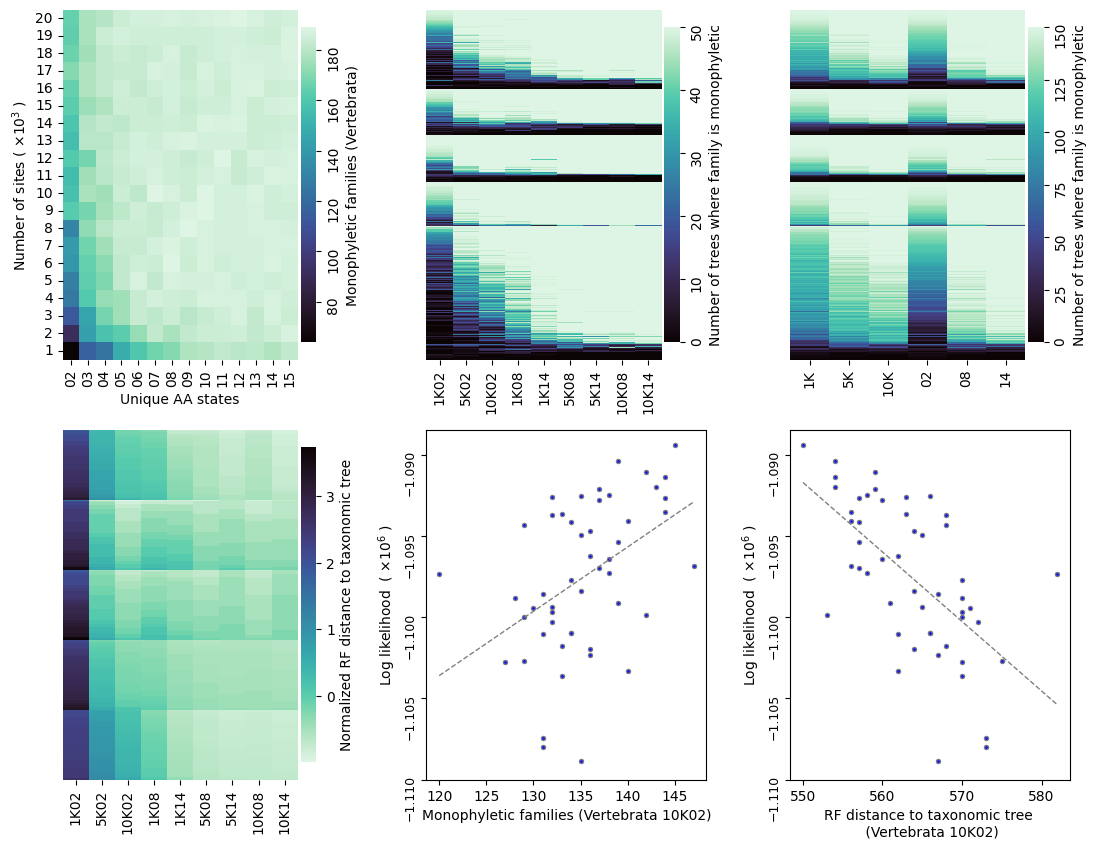

In [782]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.subplots_adjust(wspace=0.3)

sp = sns.heatmap(h1[(h1[11] == 've') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=False,# vmin=50, vmax=210,
            cbar_kws={'label': 'Monophyletic families (Vertebrata)',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,0])

_=ax[0,0].set_xlabel('Unique AA states')
_=ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation = 90)
_=ax[0,0].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[0,0].set_yticklabels([int(int(x._text)/1000) for x in ax[0,0].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
#cbar.set_ticks(range(60,220,20))
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

# sns.kdeplot(pd.Series(f1[f1[3] == 'ar'].value_counts(1)), ax = ax[0,1])
# sns.kdeplot(pd.Series(f1[f1[3] == 'as'].value_counts(1)), ax = ax[0,1])
# sns.kdeplot(pd.Series(f1[f1[3] == 'ba'].value_counts(1)), ax = ax[0,1])
# sns.kdeplot(pd.Series(f1[f1[3] == 've'].value_counts(1)), ax = ax[0,1])
# ax[0,1].legend(["Arthropoda", "Ascomycota", "Basidiomycota", "Vertebrata"])

# _=ax[0,1].set_xlabel('Incidence of family monophyly')
# #ax[0,1].get_yaxis().set_visible(False)
# ax[0,1].set_ylabel("KDE density")
# ax[0,1].set_yticks([])
# #ax[0,1].set_xlim(0,650)

sp = sns.heatmap(fx[['2_01000','2_05000','2_10000','8_01000','14_01000','8_05000','14_05000','8_10000','14_10000']].fillna(0), cmap = 'mako', annot=False,
            cbar_kws={'label': 'Number of trees where family is monophyletic',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,1])

_=ax[0,1].set_xlabel('')
_=ax[0,1].set_xticklabels(['1K02', '5K02', '10K02', '1K08', '1K14', '5K08','5K14','10K08','10K14'], rotation = 90)#, font = 'monospace')
_=ax[0,1].set_ylabel('')
_=ax[0,1].set_yticks([])#, font = 'monospace')
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


sp = sns.heatmap(fx[[1000,5000,10000,'2','8','14']].fillna(0), cmap = 'mako', annot=False,
            cbar_kws={'label': 'Number of trees where family is monophyletic',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,2])

_=ax[0,2].set_xlabel('')
_=ax[0,2].set_xticklabels(['1K', '5K', '10K', '02', '08', '14'], rotation = 90)#, font = 'monospace')
_=ax[0,2].set_ylabel('')
_=ax[0,2].set_yticks([])#, font = 'monospace')
cbar = sp.collections[0].colorbar
cbar.set_ticks(range(0,175,25))
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


sp = sns.heatmap(pd.concat([qc1,qc2,qc3,qc4,qc5,qc6,qc7,qc8,qc9],
                      axis=1)[['2_1k','2_5k','2_10k','8_1k','14_1k','8_5k','14_5k','8_10k','14_10k']], cmap = 'mako_r', annot=False,
            cbar_kws={'label': 'Normalized RF distance to taxonomic tree',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,0])

_=ax[1,0].set_xlabel('')
_=ax[1,0].set_xticklabels(['1K02', '5K02', '10K02', '1K08', '1K14', '5K08','5K14','10K08','10K14'], rotation = 90)#, font = 'monospace')
_=ax[1,0].set_ylabel('')
_=ax[1,0].set_yticks([])#, font = 'monospace')
cbar = sp.collections[0].colorbar
#cbar.set_ticks(range(0,175,25))
#cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


sns.regplot(x=l24[(l24[3] == '02') & (l24[13] == 10000)][4], y=l24[(l24[3] == '02')& (l24[13] == 10000)][41], ci = None, ax = ax[1,1],
                scatter_kws={'s':8, "color":"blue", "edgecolors":'grey'},  line_kws={"ls": '--', "color" : "grey", "linewidth":1}) 

_=ax[1,1].set_yticks(ax[1,1].get_yticks()[::2])
_=ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(), rotation = 90)
_=ax[1,1].tick_params(axis='y', which='major', labelsize=9)
_=ax[1,1].set_ylabel('Log likelihood  ( $×10^6$ )')
_=ax[1,1].set_xlabel('Monophyletic families (Vertebrata 10K02)')


# sp = sns.heatmap(h7nrm, annot=h7, cmap = 'mako', fmt='.0f', cbar =False,
#             cbar_kws={'label': 'Normalized RF distance to taxonomic tree',
#                      "orientation": "vertical", "pad":0.01,
#                      "shrink": 0.9}, ax = ax[1,2])

# _=ax[1,2].set_xlabel('')
# #_=ax[1,2].set_xticklabels(['1K02', '5K02', '10K02', '1K08', '1K14', '5K08','5K14','10K08','10K14'], rotation = 90)#, font = 'monospace')
# _=ax[1,2].set_ylabel('')
# _=ax[1,2].set_yticklabels(range(5,80,5), rotation = 0)#, font = 'monospace')
# cbar = sp.collections[0].colorbar


sns.regplot(x=l24[(l24[3] == '02') & (l24[13] == 10000)]['R-F'], y=l24[(l24[3] == '02')& (l24[13] == 10000)][41], ci = None, ax = ax[1,2],
                scatter_kws={'s':8, "color":"blue", "edgecolors":'grey'},  line_kws={"ls": '--', "color" : "grey", "linewidth":1}) 

_=ax[1,2].set_yticks(ax[1,2].get_yticks()[::2])
_=ax[1,2].set_yticklabels(ax[1,2].get_yticklabels(), rotation = 90)
_=ax[1,2].tick_params(axis='y', which='major', labelsize=9)
_=ax[1,2].set_ylabel('Log likelihood  ( $×10^6$ )')
_=ax[1,2].set_xlabel('RF distance to taxonomic tree \n (Vertebrata 10K02)')

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [474]:
#coa vs conc
h4 = pd.read_csv('../r6/er3p.an', sep = '\t', header = None)
h4[2] = h4[0].apply(lambda x: x[:2])
h4[3] = h4[1].apply(lambda x: int(x.split(',')[2].strip()))
h4[4] = h4[0].apply(lambda x: int(x[2:4]))
h2[33] = np.nan
h2[34] = np.nan
h2.loc[h2[h2[11] == 'eu'].iloc[0:14].index, 33] = h4.iloc[0:14,3].values
h2.loc[h2[h2[11] == 'eu'].iloc[0:14].index, 34] = h4.iloc[0:14,4].values
h2.loc[h2[h2[11] == 'ar'].iloc[0:14].index, 33] = h4.iloc[15:29,3].values
h2.loc[h2[h2[11] == 'ar'].iloc[0:14].index, 34] = h4.iloc[15:29,4].values
h2.loc[h2[h2[11] == 've'].iloc[0:14].index, 33] = h4.iloc[30:44,3].values
h2.loc[h2[h2[11] == 've'].iloc[0:14].index, 34] = h4.iloc[30:44,4].values
h4[35] = 'Coalescent'
h2[35] = 'Concatenated'
h5 = pd.concat([h2[(h2[3] == '08') & (h2[13] == 10000)],h4.rename(columns = {0:0,1:1,2:11,3:4,4:34})], axis = 0)
h6 = pd.concat([h2[(h2[3] == '14') & (h2[13] == 10000)],h4.rename(columns = {0:0,1:1,2:11,3:4,4:34})], axis = 0)

h4[5] = h4[0].apply(lambda x: x[2:4])
h4[6] = h4[0].index
h7 = h4.pivot(index = 2, columns = 4, values = 3).transpose()
h7nrm = (h7 - h7.mean())/h7.std()

In [703]:
h2a = h2[(h2[3] == '08') & (h2[13] == 10000)]
h2a[35] = '10K08'
h2b = h2[(h2[3] == '14') & (h2[13] == 10000)]
h2b[35] = '10K14'
h8 = pd.concat([h2a,h2b,h4.rename(columns = {0:0,1:1,2:11,3:4,4:34})], axis = 0)

/tmp/ipykernel_1920205/3033042141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2a[35] = '10K08'
/tmp/ipykernel_1920205/3033042141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2b[35] = '10K14'


In [748]:
h9 = h8[(h8[34].isnull()) | (h8[34] > 10)]

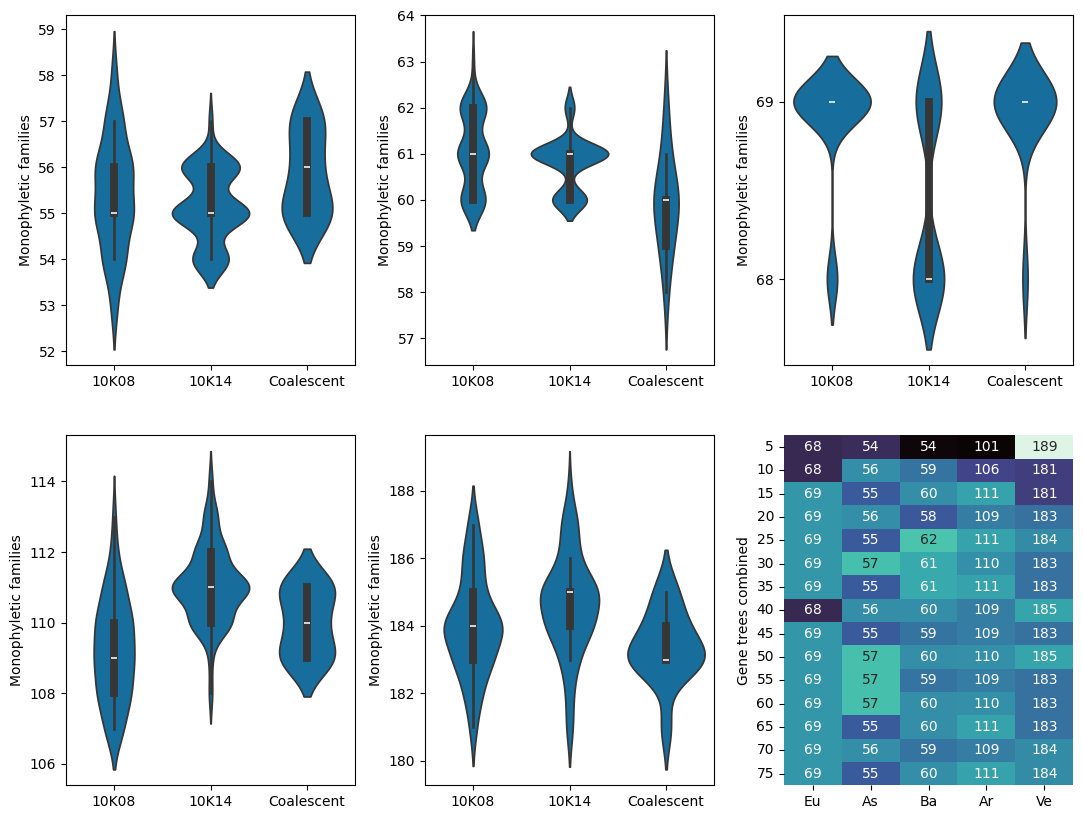

In [793]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.subplots_adjust(wspace=0.24)

sns.violinplot(data=h9[h9[11] == 'as'], x= 35, y = 4, ax = ax[0,0])
_=ax[0,0].set_ylabel('Monophyletic families')
_=ax[0,0].set_xlabel('')

sns.violinplot(data=h9[h9[11] == 'ba'], x= 35, y = 4, ax = ax[0,1])
_=ax[0,1].set_ylabel('Monophyletic families')
_=ax[0,1].set_xlabel('')

sns.violinplot(data=h9[h9[11] == 'eu'], x= 35, y = 4, ax = ax[0,2])
_=ax[0,2].set_yticks([68,69])
_=ax[0,2].set_yticklabels(ax[0,2].get_yticklabels(), rotation = 0)
#_=ax[0,2].tick_params(axis='y', which='major', labelsize=9)
_=ax[0,2].set_ylabel('Monophyletic families')
_=ax[0,2].set_xlabel('')

sns.violinplot(data=h9[h9[11] == 'ar'], x= 35, y = 4, ax = ax[1,0])
_=ax[1,0].set_ylabel('Monophyletic families')
_=ax[1,0].set_xlabel('')

sns.violinplot(data=h9[h9[11] == 've'], x= 35, y = 4, ax = ax[1,1])
_=ax[1,1].set_ylabel('Monophyletic families')
_=ax[1,1].set_xlabel('')

sp = sns.heatmap(h7nrm[['eu','as','ba','ar','ve']], annot=h7[['eu','as','ba','ar','ve']], cmap = 'mako', fmt='.0f', cbar =False,
            cbar_kws={'label': 'Normalized RF distance to taxonomic tree',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,2])

_=ax[1,2].set_xlabel('')
_=ax[1,2].set_xticklabels(['Eu', 'As', 'Ba', 'Ar', 'Ve'], rotation = 0)#, font = 'monospace')
_=ax[1,2].set_ylabel('Gene trees combined')
_=ax[1,2].set_yticklabels(range(5,80,5), rotation = 0)#, font = 'monospace')
cbar = sp.collections[0].colorbar

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [553]:
#gcf
import pandas as pd
import BioNick as bn
import sys
sys.setrecursionlimit(10000)
xt1 = open('/wing2/users/mdalam/temp/'+sys.argv[1],'r').readlines()
xu1 = open('/data2/scratch/cat/r6/'+sys.argv[2]).readlines()
t = set(bn.leaves(xu1[0]))
for i in xu1:
    t = t.intersection(set(bn.leaves(i)))
t2 = []
for i in xt1:
    t2.append(bn.extract_subtree(i,t))
t3 = []
for i in t2:
    t3.append(bn.root_at(i,bn.leaves(i)[5]))
t4 = []
for i in t3:
    tdf = pd.DataFrame(bn.nw_pd(i))
    if tdf[0].value_counts().min() == 1:
        continue
        print('OK')
    else:
        t4.append(i)
open(sys.argv[3],'w').write(';\n'.join(t4)+';\n')

6719810

In [608]:
t = []
for i in os.listdir('../r6/tmg/'):
    if i[-8:] == '.cf.tree':
        t.append((i, open('../r6/tmg/'+i,'r').read()))

In [610]:
tqw = pd.DataFrame(t)

In [612]:
def extract_nodelabs(tree):
    t = []
    for i in range(tree.count(')')):
        t.append(tree.split(')')[i+1].split(':')[0])
    return t

In [632]:
tqw = pd.DataFrame()
for i in os.listdir('../r6/tmg/'):
    if i[-8:] == '.cf.stat':
        tdf = pd.read_csv('../r6/tmg/'+i, sep = '\t', comment = '#')
        tdf['file']= i
        tqw = pd.concat([tqw,tdf], axis = 0)

In [633]:
tqw[1] = tqw['file'].apply(lambda x: 'coal' if '.ao2.' in x else 'conc')
tqw[2] = tqw['file'].apply(lambda x: x[:2])
tqw[3] = tqw['file'].apply(lambda x: x[2:4])

In [699]:
tqe = tqw[(tqw[4].isin(['8','14','na'])) & (tqw[5].isin(['10k','na']))]

In [700]:
tqe[['gCF',1,2]].groupby([1,2]).mean()

gCF
1    2            
coal ar  41.227328
     as  48.346924
     ba  55.288567
     eu  51.408054
     ve  41.111389
conc ar  41.492953
     as  48.958346
     ba  56.449326
     eu  51.530842
     ve  40.766835

In [706]:
tqe[6] = tqe['file'].apply(lambda x: x.split('_')[2]+x.split('_')[1] if '_' in x else 'coalescent')

/tmp/ipykernel_1920205/788602751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tqe[6] = tqe['file'].apply(lambda x: x.split('_')[2]+x.split('_')[1] if '_' in x else 'coalescent')


In [739]:
tqf = tqe.groupby('file')['gCF'].mean().reset_index()

In [740]:
tqf[6] = tqf['file'].apply(lambda x: x.split('_')[2]+x.split('_')[1] if '_' in x else 'coalescent')
tqf[2] = tqf['file'].apply(lambda x: x[:2])

In [744]:
tqf = pd.concat([tqf[tqf[6]=='10k8'], tqf[tqf[6]=='10k14'], tqf[tqf[6]=='coalescent']])

In [754]:
tqf[7] = tqf['file'].apply(lambda x: int(x[2:4]) if '_' not in x else np.nan)

In [755]:
tqg = tqf[(tqf[7].isnull()) | (tqf[7] > 10)]

In [850]:
tqh = tqf[tqf[7].notnull()].pivot(index = 7, columns = 2, values = 'gCF')
tqhnrm = (tqh - tqh.mean())/tqh.std()

/tmp/ipykernel_1920205/1153934539.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,0].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)
/tmp/ipykernel_1920205/1153934539.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,1].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)
/tmp/ipykernel_1920205/1153934539.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,2].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)
/tmp/ipykernel_1920205/1153934539.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,0].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)
/tmp/ipykernel_192020

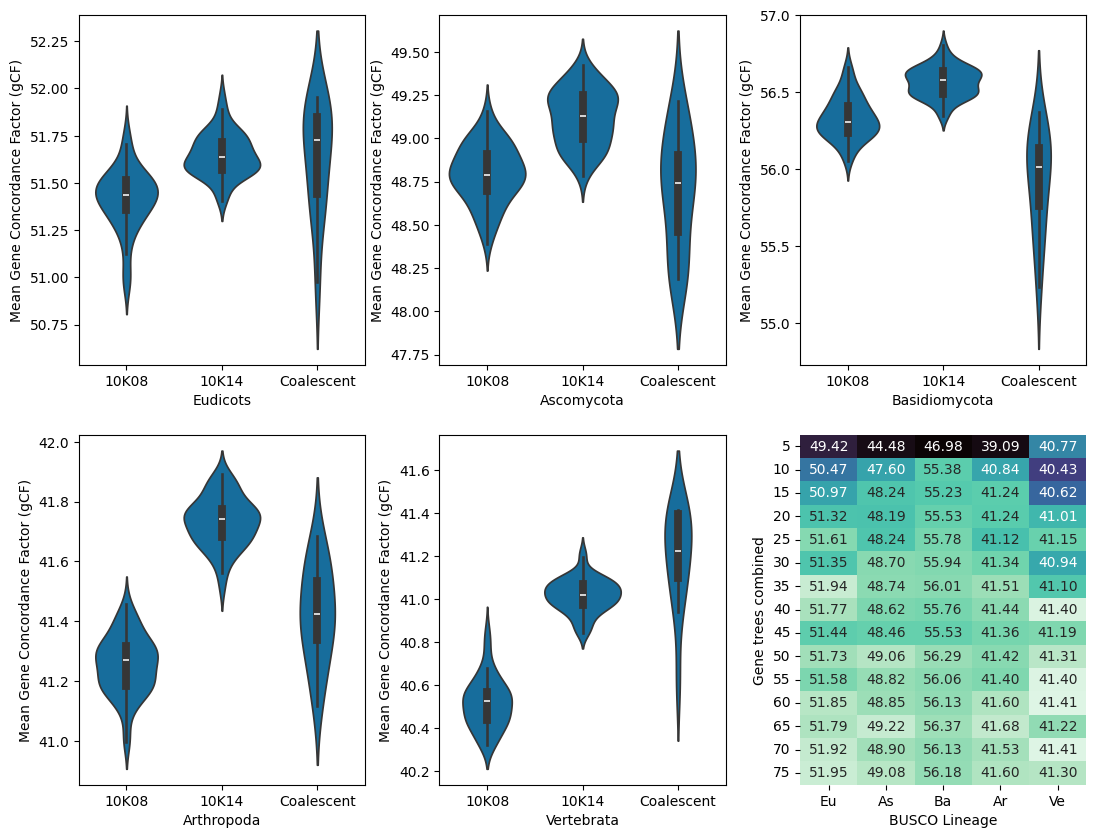

In [859]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.subplots_adjust(wspace=0.26)

sns.violinplot(data=tqg[tqg[2] == 'eu'], x= 6, y = 'gCF', ax = ax[0,0])
_=ax[0,0].set_ylabel('Mean Gene Concordance Factor (gCF)')
_=ax[0,0].set_xlabel('Eudicots')
_=ax[0,0].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)
#_=ax[0,0].set_ylim([50.5,52.5])

sns.violinplot(data=tqg[tqg[2] == 'as'], x= 6, y = 'gCF', ax = ax[0,1])
_=ax[0,1].set_ylabel('Mean Gene Concordance Factor (gCF)')
_=ax[0,1].set_xlabel('Ascomycota')
_=ax[0,1].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)

sns.violinplot(data=tqg[tqg[2] == 'ba'], x= 6, y = 'gCF', ax = ax[0,2])
_=ax[0,2].set_ylabel('Mean Gene Concordance Factor (gCF)')
_=ax[0,2].set_xlabel('Basidiomycota')
_=ax[0,2].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)

sns.violinplot(data=tqg[tqg[2] == 'ar'], x= 6, y = 'gCF', ax = ax[1,0])
_=ax[1,0].set_ylabel('Mean Gene Concordance Factor (gCF)')
_=ax[1,0].set_xlabel('Arthropoda')
_=ax[1,0].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)

sns.violinplot(data=tqg[tqg[2] == 've'], x= 6, y = 'gCF', ax = ax[1,1])
_=ax[1,1].set_ylabel('Mean Gene Concordance Factor (gCF)')
_=ax[1,1].set_xlabel('Vertebrata')
_=ax[1,1].set_xticklabels(['10K08', '10K14', 'Coalescent'], rotation = 0)

sp = sns.heatmap(tqhnrm[['eu','as','ba','ar','ve']], annot=tqh[['eu','as','ba','ar','ve']], cmap = 'mako', fmt='.2f', cbar =False,
            cbar_kws={'label': 'Normalized RF distance to taxonomic tree',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,2])

_=ax[1,2].set_xlabel('BUSCO Lineage')
_=ax[1,2].set_xticklabels(['Eu', 'As', 'Ba', 'Ar', 'Ve'], rotation = 0)#, font = 'monospace')
_=ax[1,2].set_ylabel('Gene trees combined')
_=ax[1,2].set_yticklabels(range(5,80,5), rotation = 0)#, font = 'monospace')
cbar = sp.collections[0].colorbar

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [829]:
tqh = tqw[['file','gCF']].groupby('file').mean().reset_index()

In [830]:
tqh[0] = tqh['file'].apply(lambda x: '.'.join(x.split('.')[:3]))

In [832]:
l24 = pd.merge(l24, tqh[[0,'gCF']])

/tmp/ipykernel_1920205/1933364886.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0].set_xticklabels(['1K','5K','10K'], rotation = 0)


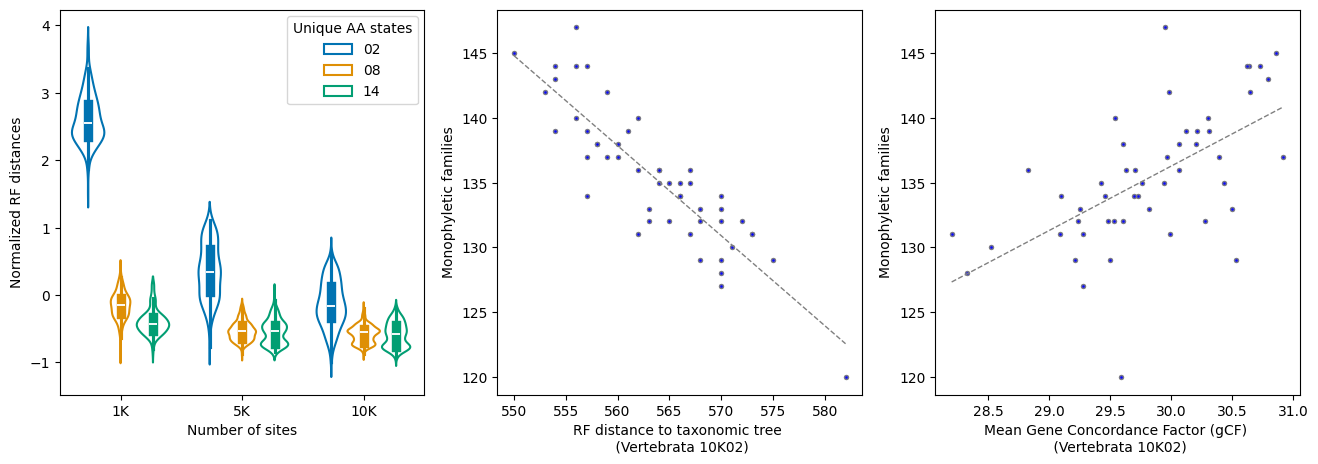

In [848]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

sns.violinplot(data=qse, x='a', y='R-F_standardized', hue='u', fill=False,ax = ax[0])
_=ax[0].set_xlabel('Number of sites')
_=ax[0].set_xticklabels(['1K','5K','10K'], rotation = 0)
_=ax[0].set_ylabel('Normalized RF distances')
#_=ax[0,3].set_yticklabels(ax[0,3].get_yticklabels(), rotation = 90

_=ax[0].legend([ax[0].get_children()[0], ax[0].get_children()[4], ax[0].get_children()[8]], ['02','08','14'],title="Unique AA states")

sns.regplot(x=l24[(l24[3] == '02') & (l24[13] == 10000)]['R-F'], y=l24[(l24[3] == '02')& (l24[13] == 10000)][4], ci = None, ax = ax[1],
                scatter_kws={'s':8, "color":"blue", "edgecolors":'grey'},  line_kws={"ls": '--', "color" : "grey", "linewidth":1}) 

_=ax[1].set_xlabel('RF distance to taxonomic tree \n (Vertebrata 10K02)')
_=ax[1].set_ylabel('Monophyletic families')


sns.regplot(x=l24[(l24[3] == '02') & (l24[13] == 10000)]['gCF'], y=l24[(l24[3] == '02')& (l24[13] == 10000)][4], ci = None, ax = ax[2],
                scatter_kws={'s':8, "color":"blue", "edgecolors":'grey'},  line_kws={"ls": '--', "color" : "grey", "linewidth":1}) 

_=ax[2].set_xlabel('Mean Gene Concordance Factor (gCF) \n (Vertebrata 10K02)')
_=ax[2].set_ylabel('Monophyletic families')
#_=ax[0,3].set_yticklabels(ax[0,3].get_yticklabels(), rotation = 90)
#_=ax[2].savefig('../r6/f2d.pdf', format = 'pdf')

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [643]:
#this is fucked up man. I need to resample another set to genes to make this unbiased.
## update: it was not fucked up. the low rate and low site trees were fucking it up.

In [644]:
t = []
for i in os.listdir('/wing2/users/mdalam/temp/ar/'):
    if i[-8:] == 'treefile':
        t.append(i)
for i in os.listdir('/wing2/users/mdalam/temp/as/'):
    if i[-8:] == 'treefile':
        t.append(i)
for i in os.listdir('/wing2/users/mdalam/temp/ba/'):
    if i[-8:] == 'treefile':
        t.append(i)
for i in os.listdir('/wing2/users/mdalam/temp/eu/'):
    if i[-8:] == 'treefile':
        t.append(i)
for i in os.listdir('/wing2/users/mdalam/temp/ve/'):
    if i[-8:] == 'treefile':
        t.append(i)

In [647]:
uul = pd.DataFrame(t)

In [653]:
uul[1] = uul[0].apply(lambda x: x.split('.')[0].replace('_aln',''))

In [655]:
uul[2] = uul[1].apply(lambda x: x.split('_')[1] if '_' in x else x)

In [659]:
cus = pd.read_csv('/wing2/users/mdalam/public_html/UniPhy/CUS.tsv', sep = '\t')

In [667]:
t = []
for i in os.listdir('/data2/scratch/cat/r7/arthropoda/ar1/aligned/'):
    i2 = i.split('.')[0].replace('_aln','')
    i3 = i2.split('_')[1] if '_' in i2 else i2
    if i3 not in uul[2].values and i3 in cus['Gene'].values:
        t.append(('ar',i))
for i in os.listdir('/data2/scratch/cat/r7/ascomycota/as1/aligned/'):
    i2 = i.split('.')[0].replace('_aln','')
    i3 = i2.split('_')[1] if '_' in i2 else i2
    if i3 not in uul[2].values and i3 in cus['Gene'].values:
        t.append(('as',i))
for i in os.listdir('/data2/scratch/cat/r7/basidiomycota/ba1/aligned/'):
    i2 = i.split('.')[0].replace('_aln','')
    i3 = i2.split('_')[1] if '_' in i2 else i2
    if i3 not in uul[2].values and i3 in cus['Gene'].values:
        t.append(('ba',i))
for i in os.listdir('/data2/scratch/cat/r7/eudicots/eu1/aligned/'):
    i2 = i.split('.')[0].replace('_aln','')
    i3 = i2.split('_')[1] if '_' in i2 else i2
    if i3 not in uul[2].values and i3 in cus['Gene'].values:
        t.append(('eu',i))
for i in os.listdir('/data2/scratch/cat/r7/vertebrata/ve1/aligned/'):
    i2 = i.split('.')[0].replace('_aln','')
    i3 = i2.split('_')[1] if '_' in i2 else i2
    if i3 not in uul[2].values and i3 in cus['Gene'].values:
        t.append(('ve',i))

In [670]:
uuk = pd.DataFrame(t)

In [672]:
import shutil

In [674]:
for i2 in uuk[uuk[0] == 'ar'][1].sample(50):
    shutil.copy('/data2/scratch/cat/r7/arthropoda/ar1/aligned/'+i2, '../r6/coal_redo/ar/'+i2)
for i2 in uuk[uuk[0] == 'as'][1].sample(50):
    shutil.copy('/data2/scratch/cat/r7/ascomycota/as1/aligned/'+i2, '../r6/coal_redo/as/'+i2)
for i2 in uuk[uuk[0] == 'ba'][1].sample(50):
    shutil.copy('/data2/scratch/cat/r7/basidiomycota/ba1/aligned/'+i2, '../r6/coal_redo/ba/'+i2)
for i2 in uuk[uuk[0] == 'eu'][1].sample(50):
    shutil.copy('/data2/scratch/cat/r7/eudicots/eu1/aligned/'+i2, '../r6/coal_redo/eu/'+i2)
for i2 in uuk[uuk[0] == 've'][1].sample(50):
    shutil.copy('/data2/scratch/cat/r7/vertebrata/ve1/aligned/'+i2, '../r6/coal_redo/ve/'+i2)

In [681]:
tqw = pd.DataFrame()
for i in os.listdir('../r6/tmg2/'):
    if i[-8:] == '.cf.stat':
        tdf = pd.read_csv('../r6/tmg2/'+i, sep = '\t', comment = '#')
        tdf['file']= i
        tqw = pd.concat([tqw,tdf], axis = 0)

In [682]:
tqw[1] = tqw['file'].apply(lambda x: 'coal' if '.ao2.' in x else 'conc')
tqw[2] = tqw['file'].apply(lambda x: x[:2])
tqw[3] = tqw['file'].apply(lambda x: x[2:4])
tqw[4] = tqw['file'].apply(lambda x: x.split('_')[1] if '_' in x else 'na')
tqw[5] = tqw['file'].apply(lambda x: x.split('_')[2] if '_' in x else 'na')

In [697]:
tqe = tqw[(tqw[4].isin(['8','14','na'])) & (tqw[5].isin(['10k','na']))]

In [698]:
tqe[['gCF',1,2]].groupby([1,2]).mean()

gCF
1    2            
coal ar  41.227328
     as  48.346924
     ba  55.288567
     eu  51.408054
     ve  41.111389
conc ar  41.492953
     as  48.958346
     ba  56.449326
     eu  51.530842
     ve  40.766835

In [157]:
h5.loc[h5[11] == 'eu', 36] = h5.loc[h5[11] == 'eu', 4]/69
h5.loc[h5[11] == 'ar', 36] = h5.loc[h5[11] == 'ar', 4]/125
h5.loc[h5[11] == 've', 36] = h5.loc[h5[11] == 've', 4]/221

In [242]:
copyDF(h1[(h1[11] == 've') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4))

<IPython.core.display.Javascript object>

/tmp/ipykernel_1090450/1995772262.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1090450/1995772262.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1090450/1995772262.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1090450/1995772262.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)
/tmp/ipykernel_1090450/199577226

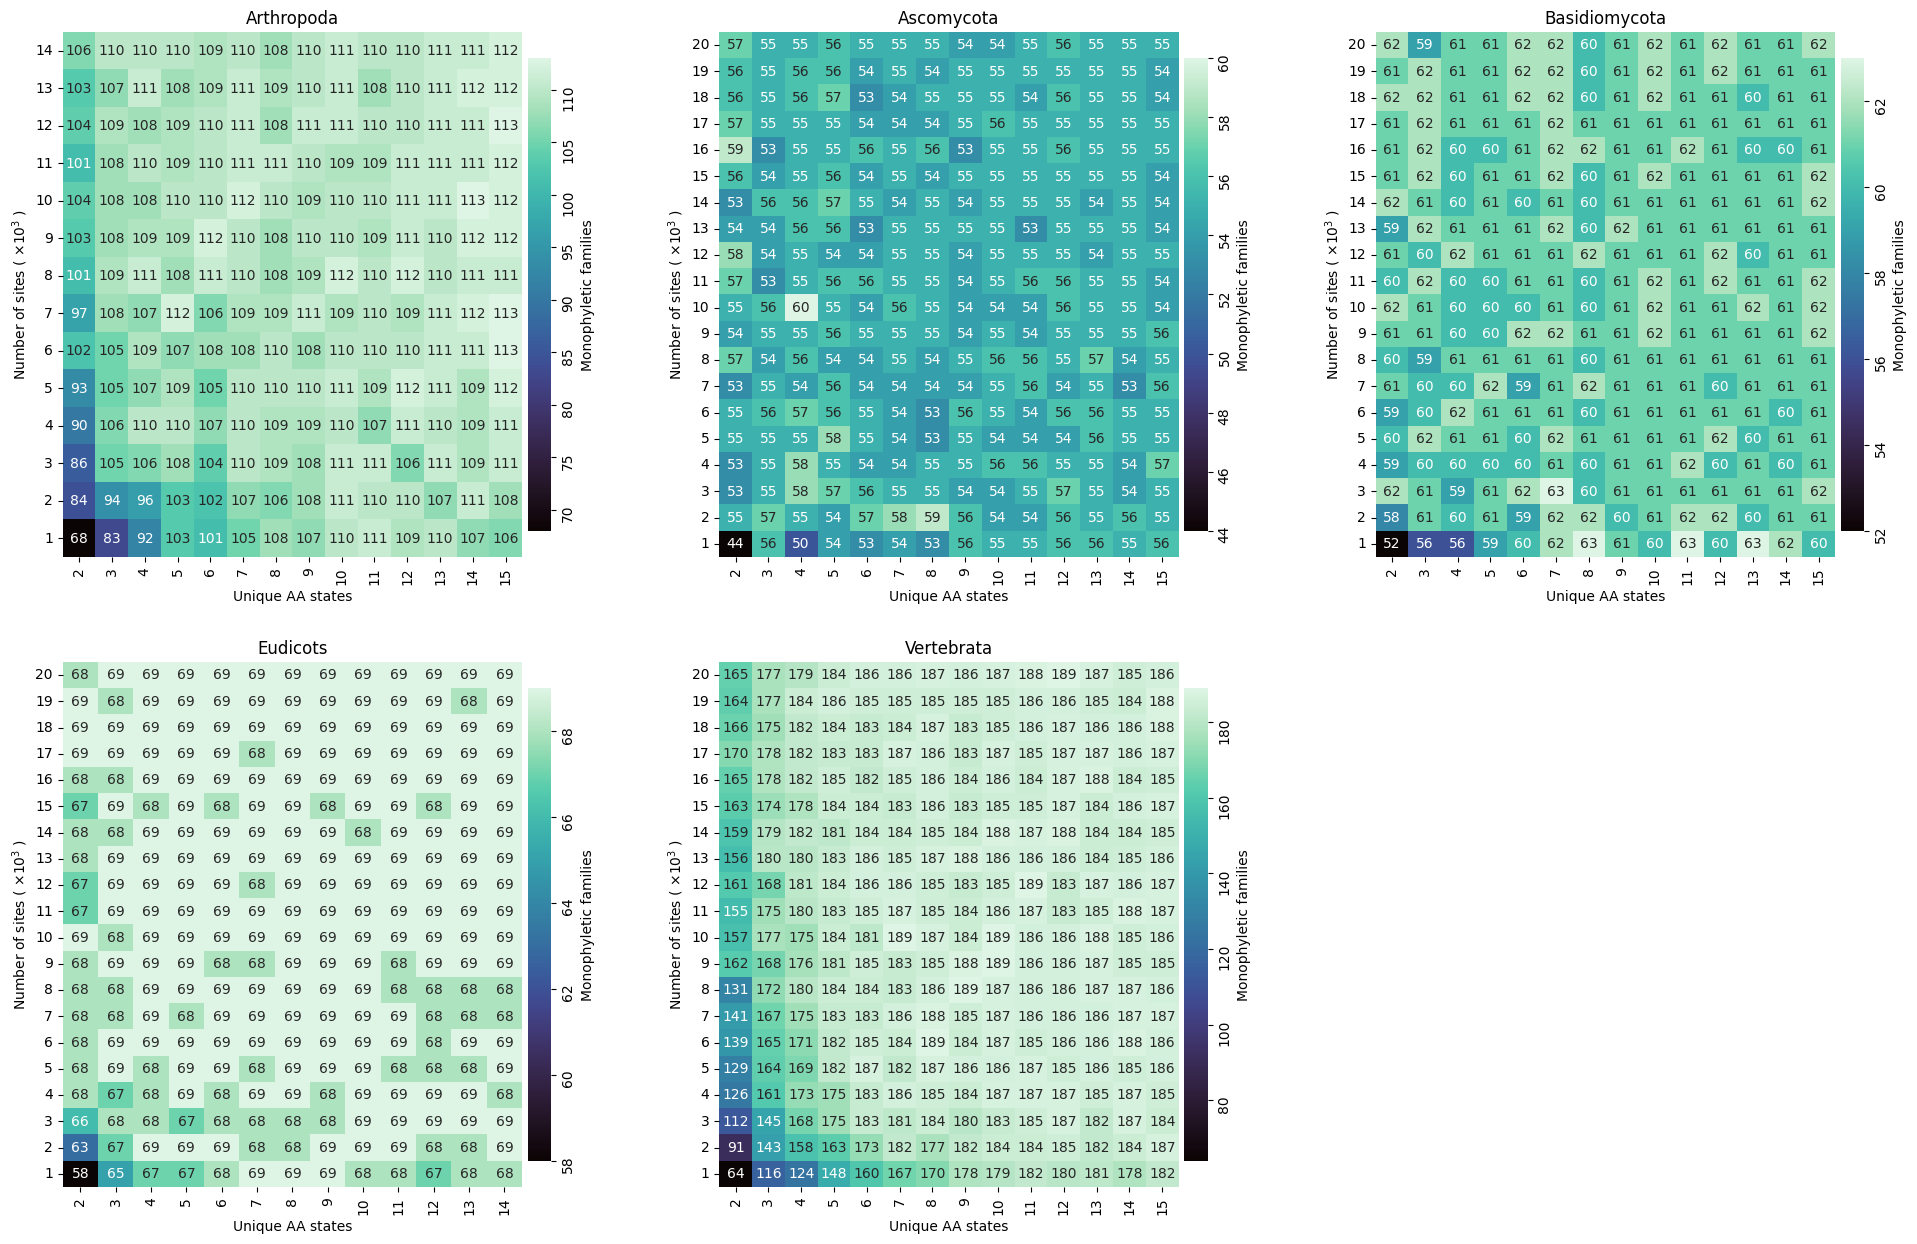

In [523]:
#all heat
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 15))

sp = sns.heatmap(h1[(h1[11] == 'ar') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=True, fmt='g',
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,0])

_=ax[0,0].set_title('Arthropoda')
_=ax[0,0].set_xlabel('Unique AA states')
_=ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation = 90)
_=ax[0,0].set_xticklabels(range(2,16), rotation = 90)
_=ax[0,0].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[0,0].set_yticklabels([int(int(x._text)/1000) for x in ax[0,0].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)


sp = sns.heatmap(h1[(h1[11] == 'as') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=True, fmt='g',
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,1])

_=ax[0,1].set_title('Ascomycota')
_=ax[0,1].set_xlabel('Unique AA states')
_=ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation = 90)
_=ax[0,1].set_xticklabels(range(2,16), rotation = 90)
_=ax[0,1].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[0,1].set_yticklabels([int(int(x._text)/1000) for x in ax[0,1].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

sp = sns.heatmap(h1[(h1[11] == 'ba') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=True, fmt='g',
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,2])

_=ax[0,2].set_title('Basidiomycota')
_=ax[0,2].set_xlabel('Unique AA states')
_=ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation = 90)
_=ax[0,2].set_xticklabels(range(2,16), rotation = 90)
_=ax[0,2].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[0,2].set_yticklabels([int(int(x._text)/1000) for x in ax[0,2].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

sp = sns.heatmap(h1[(h1[11] == 'eu') & (h1[3] != '16') & (h1[3] != '15')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), 
                 cmap = 'mako', annot=True, fmt='g',
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,0])

_=ax[1,0].set_title('Eudicots')
_=ax[1,0].set_xlabel('Unique AA states')
_=ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation = 90)
_=ax[1,0].set_xticklabels(range(2,15), rotation = 90)
_=ax[1,0].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[1,0].set_yticklabels([int(int(x._text)/1000) for x in ax[1,0].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

sp = sns.heatmap(h1[(h1[11] == 've') & (h1[3] != '16')].pivot(index = 12, columns = 3, values = 4).sort_index(ascending = 0), cmap = 'mako', annot=True, fmt='g',
            cbar_kws={'label': 'Monophyletic families',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,1])

_=ax[1,1].set_title('Vertebrata')
_=ax[1,1].set_xlabel('Unique AA states')
_=ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation = 90)
_=ax[1,1].set_xticklabels(range(2,16), rotation = 90)
_=ax[1,1].set_ylabel('Number of sites ( $×10^3$ )')
_=ax[1,1].set_yticklabels([int(int(x._text)/1000) for x in ax[1,1].get_yticklabels()], rotation = 0)
cbar = sp.collections[0].colorbar
cbar.set_ticklabels([int(x) for x in cbar.get_ticks()], rotation = 90)

ax[1,2].set_visible(False)

#plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [880]:
for i in ['eu','as','ba','ar','ve']:
    print(stats.ttest_ind(tqg[(tqg[2] == i) & (tqg[6] == '10k14')]['gCF'], tqg[(tqg[2] == i) & (tqg[6] == 'coalescent')]['gCF'], equal_var = 0))

TtestResult(statistic=0.18876061577686348, pvalue=0.8531970179122896, df=12.992562916426996)
TtestResult(statistic=4.357144214763704, pvalue=0.0007145395756566856, df=13.48673235418562)
TtestResult(statistic=6.857979981196608, pvalue=1.3851104685119282e-05, df=12.55738207885079)
TtestResult(statistic=6.61775208498841, pvalue=1.2913781880621352e-05, df=13.690442821111793)
TtestResult(statistic=-2.6389640108118084, pvalue=0.02073037760764784, df=12.73335318288494)


In [888]:
stats.stats.pearsonr(l24[(l24[3] == '02') & (l24[13] == 10000)]['gCF'], y=l24[(l24[3] == '02')& (l24[13] == 10000)][4])

/tmp/ipykernel_1920205/2213648682.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats.stats.pearsonr(l24[(l24[3] == '02') & (l24[13] == 10000)]['gCF'], y=l24[(l24[3] == '02')& (l24[13] == 10000)][4])


PearsonRResult(statistic=0.5997637950113411, pvalue=4.28606507777334e-11)

In [140]:
#likelihood

/tmp/ipykernel_1090450/2364533037.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,i2].set_yticklabels(ax[0,i2].get_yticklabels(), rotation = 90)
/tmp/ipykernel_1090450/2364533037.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,i2].set_yticklabels(ax[0,i2].get_yticklabels(), rotation = 90)
/tmp/ipykernel_1090450/2364533037.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,i2].set_yticklabels(ax[0,i2].get_yticklabels(), rotation = 90)
/tmp/ipykernel_1090450/2364533037.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,i2].set_yticklabels(ax[0,i2].get_yticklabels(), rotation = 90)
/tmp/ipykernel_1090450/2364533037.py:50: Use

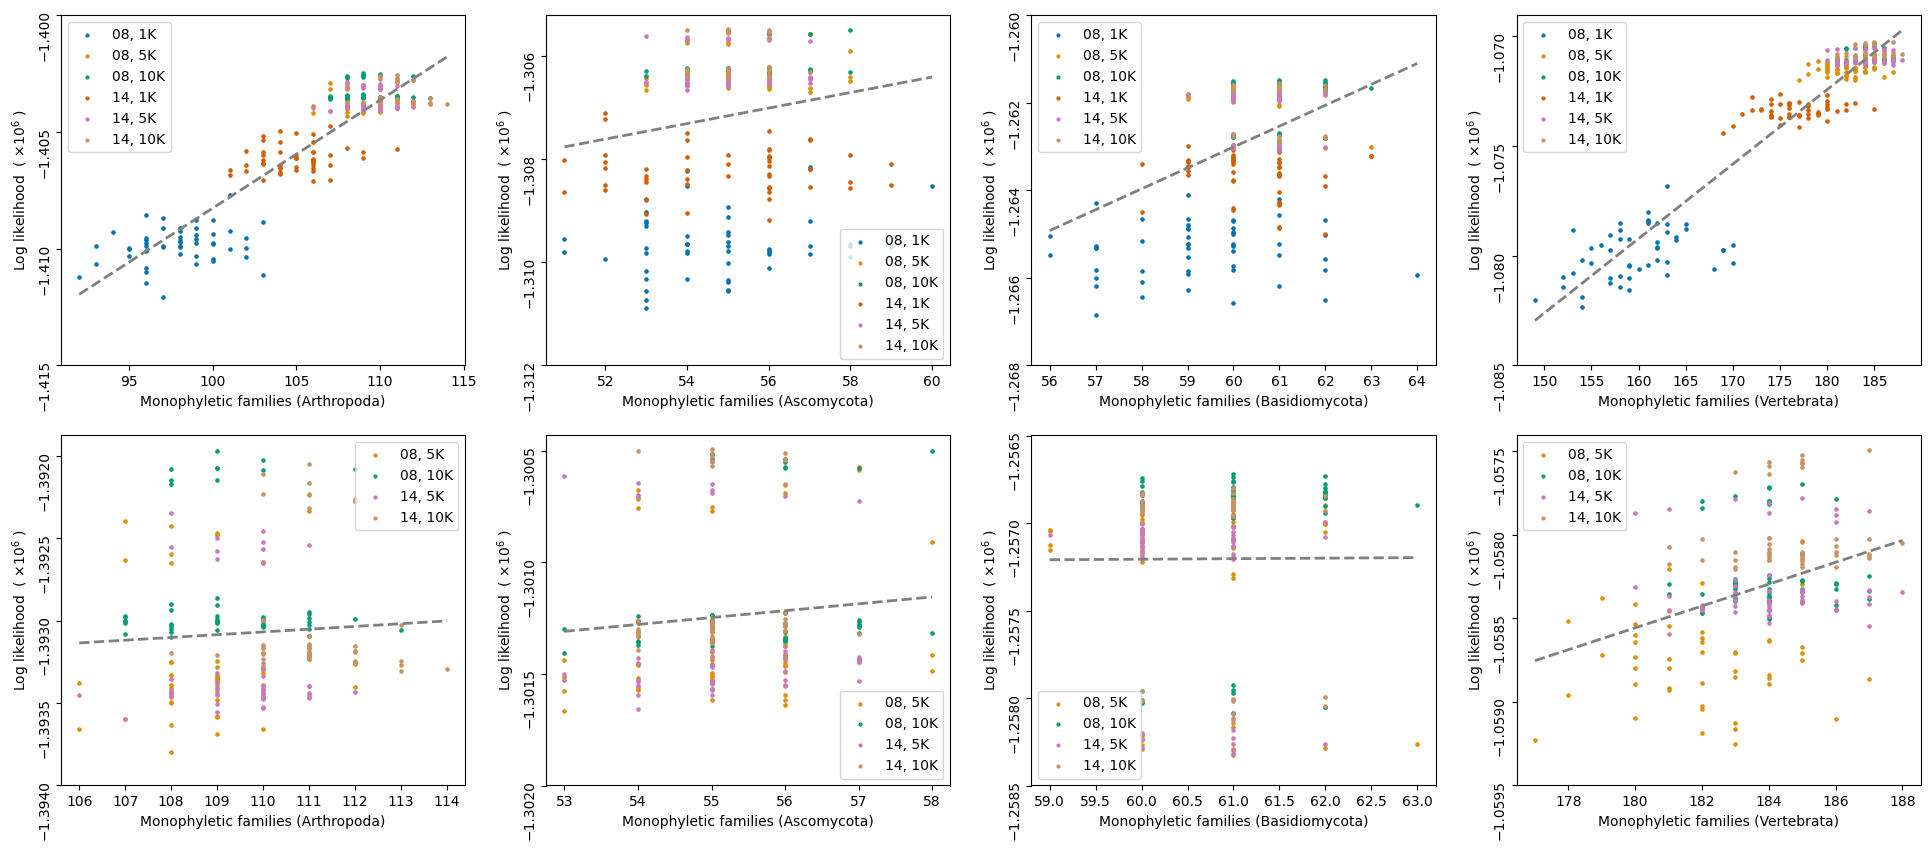

In [524]:
sns.set_palette('colorblind')
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

c=0
for i in ['08', '14']:
    for i2 in [1000,5000,10000]:
        ax[0,0].scatter(x=l21[(l21[3] == i) & (l21[13] == i2)][4], y=l21[(l21[3] == i)& (l21[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[0,1].scatter(x=l22[(l22[3] == i) & (l22[13] == i2)][4], y=l22[(l22[3] == i)& (l22[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[0,2].scatter(x=l23[(l23[3] == i) & (l23[13] == i2)][4], y=l23[(l23[3] == i)& (l23[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[0,3].scatter(x=l24[(l24[3] == i) & (l24[13] == i2)][4], y=l24[(l24[3] == i)& (l24[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        c+=1
        
sns.regplot(x=l21[(l21[3] != '02')][4], y=l21[(l21[3] != '02')][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[0,0]) 
sns.regplot(x=l22[(l22[3] != '02')][4], y=l22[(l22[3] != '02')][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[0,1]) 
sns.regplot(x=l23[(l23[3] != '02')][4], y=l23[(l23[3] != '02')][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[0,2]) 
sns.regplot(x=l24[(l24[3] != '02')][4], y=l24[(l24[3] != '02')][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[0,3])

c=1
for i in ['08', '14']:
    for i2 in [5000,10000]:
        ax[1,0].scatter(x=l21[(l21[3] == i) & (l21[13] == i2)][4], y=l21[(l21[3] == i)& (l21[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[1,1].scatter(x=l22[(l22[3] == i) & (l22[13] == i2)][4], y=l22[(l22[3] == i)& (l22[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[1,2].scatter(x=l23[(l23[3] == i) & (l23[13] == i2)][4], y=l23[(l23[3] == i)& (l23[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        ax[1,3].scatter(x=l24[(l24[3] == i) & (l24[13] == i2)][4], y=l24[(l24[3] == i)& (l24[13] == i2)][41], s = 4, color = sns.color_palette('colorblind')[c])
        c+=1
        if c == 3:
            c+=1

sns.regplot(x=l21[(l21[3] != '02') & (l21[13] != 1000)][4], y=l21[(l21[3] != '02') & (l21[13] != 1000)][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[1,0]) 
sns.regplot(x=l22[(l22[3] != '02') & (l22[13] != 1000)][4], y=l22[(l22[3] != '02') & (l22[13] != 1000)][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[1,1]) 
sns.regplot(x=l23[(l23[3] != '02') & (l23[13] != 1000)][4], y=l23[(l23[3] != '02') & (l23[13] != 1000)][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[1,2]) 
sns.regplot(x=l24[(l24[3] != '02') & (l24[13] != 1000)][4], y=l24[(l24[3] != '02') & (l24[13] != 1000)][41], color = 'grey', ci = None, scatter_kws={'s':0.0}, 
             line_kws={"ls": '--', "color" : "grey", "linewidth":2}, ax = ax[1,3]) 

for i2 in range(4):
    ax[0,i2].legend(['08, 1K', '08, 5K', '08, 10K', '14, 1K', '14, 5K', '14, 10K'])#, loc = 'upper left')
    ax[0,i2].set_yticklabels(ax[0,i2].get_yticklabels(), rotation = 90)
    ax[0,i2].set_ylabel('Log likelihood  ( $×10^6$ )')
    ax[0,i2].set_yticks(ax[0,i2].get_yticks()[::2])

for i2 in range(4):
    ax[1,i2].legend(['08, 5K', '08, 10K', '14, 5K', '14, 10K'])#, loc = 'upper left')
    ax[1,i2].set_yticklabels(ax[1,i2].get_yticklabels(), rotation = 90)
    ax[1,i2].set_ylabel('Log likelihood  ( $×10^6$ )')
    ax[1,i2].set_yticks(ax[1,i2].get_yticks()[::2])

ax[0,0].set_xlabel('Monophyletic families (Arthropoda)')
ax[0,1].set_xlabel('Monophyletic families (Ascomycota)')
ax[0,2].set_xlabel('Monophyletic families (Basidiomycota)')
ax[0,3].set_xlabel('Monophyletic families (Vertebrata)')
ax[1,0].set_xlabel('Monophyletic families (Arthropoda)')
ax[1,1].set_xlabel('Monophyletic families (Ascomycota)')
ax[1,2].set_xlabel('Monophyletic families (Basidiomycota)')
ax[1,3].set_xlabel('Monophyletic families (Vertebrata)')

#fig.supxlabel('Monophyletic families')
#fig.supylabel('Log likelihood')

plt.savefig('../r6/f2d.pdf', format = 'pdf')

/tmp/ipykernel_1920205/2385133719.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
/tmp/ipykernel_1920205/2385133719.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
/tmp/ipykernel_1920205/2385133719.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[0,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
/tmp/ipykernel_1920205/2385133719.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax[1,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
/tmp/ipykernel_1920205/2385133719.py:16: UserWarning: set_ticklabels() should on

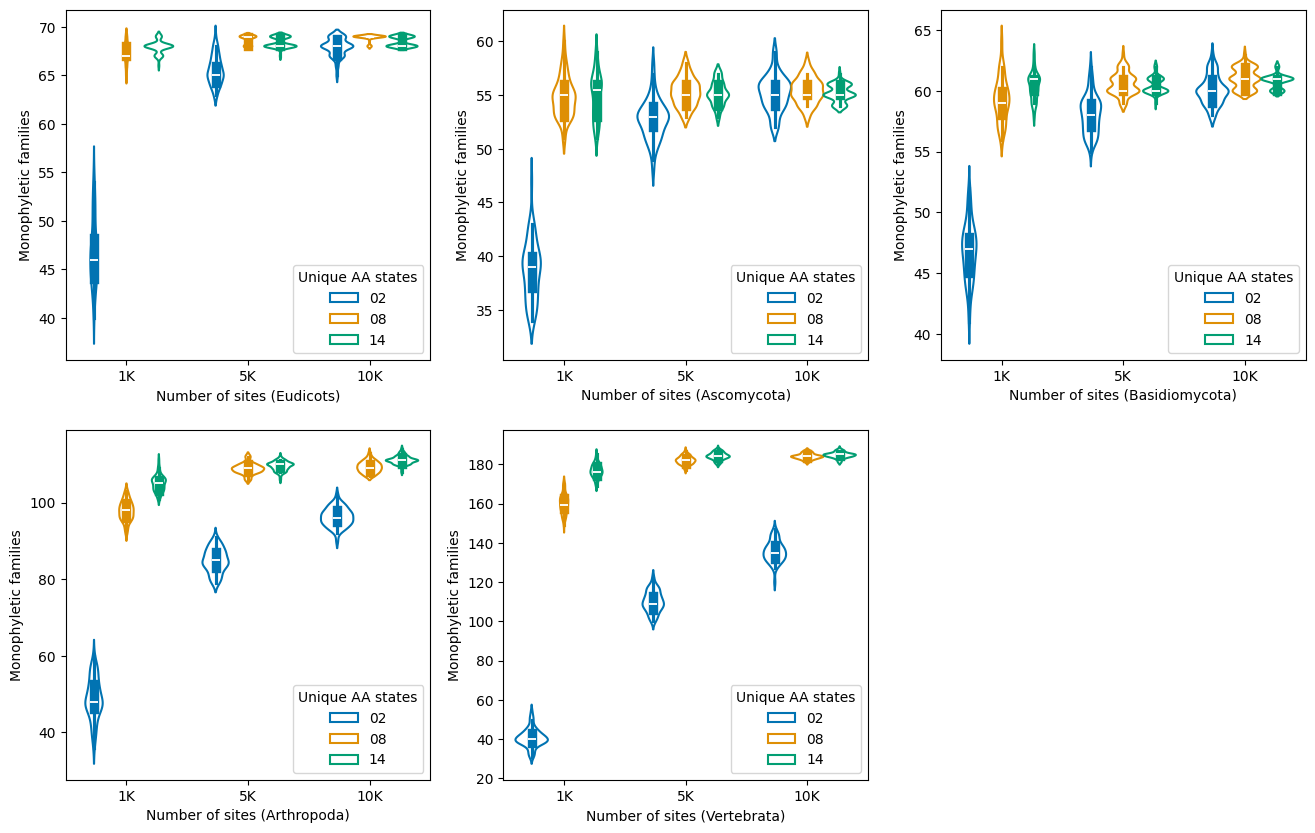

In [429]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

sns.violinplot(data=h2[h2[11] == 'eu'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[0,0])
sns.violinplot(data=h2[h2[11] == 'as'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[0,1])
sns.violinplot(data=h2[h2[11] == 'ba'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[0,2])
sns.violinplot(data=h2[h2[11] == 'ar'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[1,0])
sns.violinplot(data=h2[h2[11] == 've'].sort_values(3), x=13, y=4, hue=3, fill=False, ax = ax[1,1])

for i in range(3):
    _=ax[0,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
    _=ax[0,i].set_ylabel('Monophyletic families')
    #_=ax[11].set_yticklabels(ax[1,1].get_yticklabels(), rotation = 90)
    _=ax[0,i].legend([ax[0,0].get_children()[0], ax[0,i].get_children()[4], ax[0,i].get_children()[8]], ['02','08','14'],title="Unique AA states")

for i in range(2):
    _=ax[1,i].set_xticklabels(['1K','5K','10K'], rotation = 0)
    _=ax[1,i].set_ylabel('Monophyletic families')
    #_=ax[11].set_yticklabels(ax[1,1].get_yticklabels(), rotation = 90)
    _=ax[1,i].legend([ax[0,0].get_children()[0], ax[0,i].get_children()[4], ax[0,i].get_children()[8]], ['02','08','14'],title="Unique AA states")

_=ax[0,0].set_xlabel('Number of sites (Eudicots)')
_=ax[0,1].set_xlabel('Number of sites (Ascomycota)')
_=ax[0,2].set_xlabel('Number of sites (Basidiomycota)')
_=ax[1,0].set_xlabel('Number of sites (Arthropoda)')
_=ax[1,1].set_xlabel('Number of sites (Vertebrata)')

ax[1,2].set_visible(False)

#plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [ ]:
#coa vs conc
with open('../r6/tm3/ba_2_1000.afa.treefile','r') as f: #
    l = f.readline()[:-1]

t1 = pd.DataFrame(bn.leaves(l))
t1 = pd.merge(t1,m3[['on','phylum','class','order','family','genus']], left_on=0, right_on='on', how = 'left') #

t = []
for i in os.listdir('/wing2/users/mdalam/temp/ba'): #
    if i[-6:] == 'iqtree':
        i = i[:-6]+'treefile'
        with open('/wing2/users/mdalam/temp/ba/'+i,'r') as f: #
            l = f.readline()
        t.append(l)

t2 = []
for i in t:
    t2.append(bn.extract_subtree(i[:-2],set(bn.leaves(i[:-2])).intersection(t1['on'].to_list()))+';') #
    print(len(t2))
    
for i in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]:
    tmp = random.sample(t2,i)

    with open('../r6/coat/ba{0}.ts2'.format(str(i).zfill(2)), 'w') as f: #
        for i in tmp:
            f.write(i)
            f.write('\n')

In [ ]:
#terminal leaf configs

In [143]:
with open('../r6/tmr/ar_2_1k_r1.afa_1.b1','r') as f:
    l1 = f.readline()[:-1]
with open('../r6/tmr/as_2_1k_r1.afa_1.b1','r') as f:
    l2 = f.readline()[:-1]
with open('../r6/tmr/ba_2_1k_r1.afa_1.b1','r') as f:
    l3 = f.readline()[:-1]
with open('../r6/tmr/eu_2_1k_r1.afa_1.b1','r') as f:
    l4 = f.readline()[:-1]
with open('../r6/tmr/ve_2_1k_r1.afa_1.b1','r') as f:
    l5 = f.readline()[:-1]

In [144]:
a1 = pd.read_csv('../r6/g3.an', sep = ' ', header = None )
a1 = a1[a1[2].isin(bn.leaves(l1) + bn.leaves(l2) + bn.leaves(l3) + bn.leaves(l4) + bn.leaves(l5))]
a1 = a1[a1.duplicated([0,1],keep = 0)]
a1[4] = a1[0].apply(lambda x: x.split('_')[0])
a1[5] = a1[0].apply(lambda x: x.split('_')[1])
a1[6] = a1[0].apply(lambda x: x.split('_')[2].replace('k','000'))
a1[7] = a1[0]+'_'+a1[1].astype(str)
a2 = a1.groupby(7)[2].apply(set).apply(sorted).reset_index()
a2[3] = a2[7].apply(lambda x: x.split('_')[0])
a2[4] = a2[7].apply(lambda x: x.split('_')[1])
a2[5] = a2[7].apply(lambda x: x.split('_')[2].replace('k','000'))
a2[6] = a2[2].astype(str)
a2[4] = a2[4].astype(int)
a2[5] = a2[5].astype(int)

In [595]:
a2[(a2[3] == 've') & (a2[4] == 14) & (a2[5] == 10000)][6].nunique()

648

In [600]:
sum(a2[(a2[3] == 'as') & (a2[4] == 14) & (a2[5] == 10000)][6].value_counts() == 50)

144

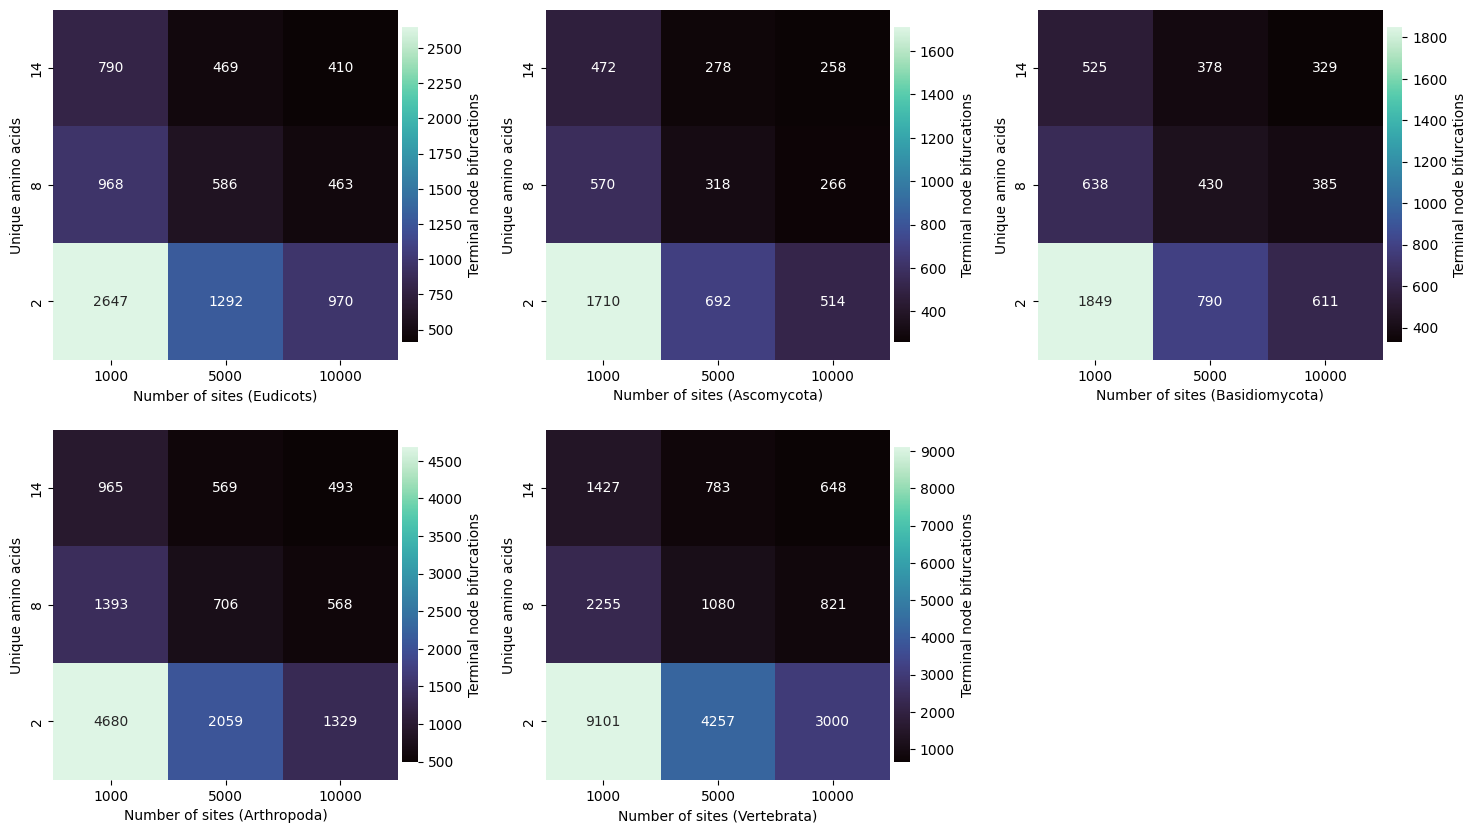

In [460]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))


sns.heatmap(a2[a2[3] == 'eu'].drop_duplicates([3,4,5,6]).sort_values([4,5]).groupby(4)[5].value_counts().reset_index().pivot(index = 4, columns = 5, values = 'count').sort_index(ascending = 0),
           cmap = 'mako', annot=True, fmt = 'g',
            cbar_kws={'label': 'Terminal node bifurcations',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,0])
ax[0,0].set_xlabel('Number of sites (Eudicots)')
ax[0,0].set_ylabel('Unique amino acids')

sns.heatmap(a2[a2[3] == 'as'].drop_duplicates([3,4,5,6]).sort_values([4,5]).groupby(4)[5].value_counts().reset_index().pivot(index = 4, columns = 5, values = 'count').sort_index(ascending = 0),
           cmap = 'mako', annot=True, fmt = 'g',
            cbar_kws={'label': 'Terminal node bifurcations',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,1])
ax[0,1].set_xlabel('Number of sites (Ascomycota)')
ax[0,1].set_ylabel('Unique amino acids')

sns.heatmap(a2[a2[3] == 'ba'].drop_duplicates([3,4,5,6]).sort_values([4,5]).groupby(4)[5].value_counts().reset_index().pivot(index = 4, columns = 5, values = 'count').sort_index(ascending = 0),
           cmap = 'mako', annot=True, fmt = 'g',
            cbar_kws={'label': 'Terminal node bifurcations',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[0,2])
ax[0,2].set_xlabel('Number of sites (Basidiomycota)')
ax[0,2].set_ylabel('Unique amino acids')

sns.heatmap(a2[a2[3] == 'ar'].drop_duplicates([3,4,5,6]).sort_values([4,5]).groupby(4)[5].value_counts().reset_index().pivot(index = 4, columns = 5, values = 'count').sort_index(ascending = 0),
           cmap = 'mako', annot=True, fmt = 'g',
            cbar_kws={'label': 'Terminal node bifurcations',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,0])
ax[1,0].set_xlabel('Number of sites (Arthropoda)')
ax[1,0].set_ylabel('Unique amino acids')

sns.heatmap(a2[a2[3] == 've'].drop_duplicates([3,4,5,6]).sort_values([4,5]).groupby(4)[5].value_counts().reset_index().pivot(index = 4, columns = 5, values = 'count').sort_index(ascending = 0),
           cmap = 'mako', annot=True, fmt = 'g',
            cbar_kws={'label': 'Terminal node bifurcations',
                     "orientation": "vertical", "pad":0.01,
                     "shrink": 0.9}, ax = ax[1,1])
ax[1,1].set_xlabel('Number of sites (Vertebrata)')
ax[1,1].set_ylabel('Unique amino acids')

ax[1,2].set_visible(False)

plt.savefig('../r6/f2d.pdf', format = 'pdf')

In [ ]:
#family x condition(1+9+3+3)

In [320]:
f0 = pd.read_csv('../r6/f32.an', header = None, sep =' ')

In [321]:
f0[3] = f0[1] + ' (' + f0[2].astype(str) + ')'
f0[4] = f0[0].apply(lambda x: x.split('_')[0])
f0[5] = f0[0].apply(lambda x: x.split('_')[1])
f0[6] = f0[0].apply(lambda x: int(x.split('_')[2].replace('k','000')))
f0[7] = f0[5] + '_' + f0[6].apply(lambda x: str(x).zfill(5))

In [322]:
f01 = f0.groupby(4)[1].value_counts().reset_index()
f02 = f0.groupby([4,5])[1].value_counts().reset_index().pivot(index = 1, columns = 5, values = 'count').reset_index()
f03 = f0.groupby([4,6])[1].value_counts().reset_index().pivot(index = 1, columns = 6, values = 'count').reset_index()
f04 = f0.groupby([4,7])[1].value_counts().reset_index().pivot(index = 1, columns = 7, values = 'count').reset_index()

In [323]:
fx = pd.merge(pd.merge((pd.merge(f01,f02)),f03),f04)

In [197]:
fx.to_csv('../r6/f3x.csv', index = 0)

In [324]:
fx.loc[fx[4] == 'ar', 'Lineage'] = 'Arthropoda'
fx.loc[fx[4] == 'as', 'Lineage'] = 'Ascomycota'
fx.loc[fx[4] == 'ba', 'Lineage'] = 'Basidiomycota'
fx.loc[fx[4] == 'eu', 'Lineage'] = 'Eudicots'
fx.loc[fx[4] == 've', 'Lineage'] = 'Vertebrata'

In [234]:
copyDF(pd.merge(fx, f0.drop_duplicates(1)[[1,2]].rename(columns = {2: 'Assemblies'})).fillna(0))

<IPython.core.display.Javascript object>

In [ ]:
z5c = z5.copy()
del z5c[0] #why?

In [27]:
#fix rooting on lir
litr = open('/wing2/users/mdalam/public_html/UniPhy/trees/lir.tree','r').read()

In [35]:
litrf= bn.extract_subtree(litr,[x for x in bn.leaves(litr) if (not x.split('_')[0] in ['Malania','Santalum','Taxillus','Tetrastigma','Vitis'])])

In [36]:
open('/wing2/users/mdalam/public_html/UniPhy/trees/lir2.tree','w').writelines(litrf)